<a id="toc"></a>
# <center style="color:#606c38; font-family: 'Dancing Script', cursive; font-size:25px;">🤖 **Clustering** </center>
<!-- 14213d -->
<!-- 4caba4 -->

### <span style='color:#E1B12D'>Tabel of Content:</span>
1. <a href="#1">Imports</a>
    1. <a href='#1.1'> Import Packages</a>
    2. <a href='#1.2'> Import Data</a>
2. <a href="#2">Data Preperation</a>
    1. <a href='#2.1'> Supporting Functions</a>
    2. <a href='#2.2'> Data Investigation</a>
    3. <a href='#2.3'> Data Preprocessing</a>
    4. <a href='#2.4'> Feature Transformations</a>
3. <a href="#3">Clustring Algorithms</a>
    1. <a href='#3.1'> K-Means</a>
    2. <a href='#3.2'> Hierarchical</a>
    3. <a href='#3.3'> DBSCAN</a>
    4. <a href='#3.4'> Gaussian Mixiture(**EM**)</a>
4. <a href="#4">📣 Clusters Analysis</a>




<a id="1"></a>
# <b>1- <span style='color:#bc6c25'>Imports</span></b> <!-- E1B12D -->

<a id="1.1"></a>
## <b>A. <span style='color:#dda15e'>Import Packages</span></b> 

In [1]:
%%capture
!pip install gap-stat
!pip install scikit-learn-intelex

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#### Preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

#### Clustring Algorithms
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

#### Dimentionality Reduction
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

#### Clusters Evaluation
from sklearn.metrics import silhouette_score
from gap_statistic import OptimalK

#### Ignore Warnings
warnings.filterwarnings("ignore")

#### Speed up scikit-learn applications for Intel(R) CPUs and GPUs
from sklearnex import patch_sklearn
patch_sklearn()


<a href="#toc" style="background-color: #dda15e; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

<a id="1.2"></a>
## <b>B. <span style='color:#dda15e'>Import Data</span></b> 

First dowmload the data set from this link: [Kaggle](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

In [3]:
#read the data

# data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
data_path = '/kaggle/input/ccdata/CC GENERAL.csv'  #the path on kaggle

df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


<a id="2"></a>
# <b>2- <span style='color:#bc6c25'>Data Preperation</span></b> <!-- E1B12D -->

<a href="#toc" style="background-color: #dda15e; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>
<a id="2.1"></a>
## <b>A. <span style='color:#dda15e'>🚁 Supporting Functions</span></b> 

### 📺 Visualization Support

In [4]:
def HeatmapPlot(df, figsize=(10, 10), threshold=0):
    plt.figure(figsize=figsize)

    mask = ~(np.tril(np.ones_like(df, dtype=bool)) & (abs(df) > threshold))

    sns.heatmap(df, annot=True, fmt='.2f', linewidths=1,
                linecolor='k', vmin=-1, vmax=1,mask=mask,
                square=True, cmap='RdBu', center=0, cbar_kws={'shrink' : .5})

In [5]:
sns.color_palette(palette='Dark2')

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

In [6]:
sns.color_palette(palette='CMRmap')

[(0.16941176470588235, 0.15, 0.5323529411764706),
 (0.3870588235294118, 0.16450980392156864, 0.6774509803921569),
 (0.7678431372549019, 0.22098039215686274, 0.3531372549019608),
 (0.9419607843137255, 0.3950980392156863, 0.06294117647058822),
 (0.9, 0.6774509803921569, 0.07098039215686275),
 (0.9, 0.8805882352941177, 0.44823529411764707)]

In [7]:
def Bar(df,Column_name,bins):
  plt.figure(figsize=(15,4))
  freq, bins, p = plt.hist(df[Column_name], bins=bins, rwidth=0.9)

  # x coordinate for labels
  bin_centers = np.diff(bins)*0.5 + bins[:-1]

  n = 0
  for fr, x, patch in zip(freq, bin_centers,p):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0],2)),
                xy = (x, height),
                xytext = (0,0.2),
                textcoords = "offset points",
                ha = 'center', va = 'bottom'
                )
    n = n+1
  plt.grid()
  plt.xticks(bins)
  plt.title(Column_name)
  plt.show;

### 📺 T-SNE Functions

In [8]:
def TSNE_2D_VIS(df, hue=None, title='T-SNE', p='CMRmap'):
    assert df.shape[1] == 2, "The 2nd Dimention should 2!!"
    sns.scatterplot(x = df[:, 0], y = df[:, 1], alpha=.7,
                    hue=hue, edgecolor='gray', palette=p)
    plt.title(title);

def TSNE_2D(df, perplexity=30, n_iter=500, init='pca', lr='auto',
            verbose=0, hue=None, title="Projection on 2D (T-SNE)"):
    tsne = TSNE(n_components=2, perplexity=perplexity,
                n_iter=n_iter, learning_rate=lr, init=init, verbose=verbose)
    df_2d = tsne.fit_transform(df)

    TSNE_2D_VIS(df_2d, hue=hue, title=title)

    return df_2d

### 🖊 Printing Formats

In [9]:
km_fmt = "K-Means visualized with T-SNE ({data_type}) [{score:.2f}]"
km_kpca_fmt = "K-Means After Applying K-PCA({kernel}) visualized with T-SNE ({dtype}) [{score:.2f}]"
db_fmt = 'DBSCAN visualized with T-SNE ({dtype}) [{score:.2f}]'
gm_fmt = 'Gaussian Mixture visualised with T-SNE ({}) [{:.2f}]'
hc_fmt = """Hierarchical Clustering visualized with T-SNE ({df_name})
({linkage}, {metric}) [{score:.2f}]"""

<a href="#toc" style="background-color: #dda15e; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>
<a id="2.2"></a>
## <b>B. <span style='color:#dda15e'> 🔍 Data Investigation(**EDA**) </span></b> 

in this part we need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)

### 💳 Essential credit card data terminology

|         **_Terminology_**         	|                                                                     **_Description_**                                                                     	|
|---------------------------------	|---------------------------------------------------------------------------------------------------------------------------------------------------------	|
| **Cardholder Name**               	| The full name of the person authorized to use the credit card.                                                                                            	|
| **Credit Card Number (PAN)**      	| The unique 15- or 16-digit number printed on the front of the card (Primary Account Number).                                                              	|
| **Expiration Date**               	| The month and year the card expires, after which it's no longer valid.                                                                                    	|
| **CVV (Card Verification Value)** 	| The 3-digit security code usually located on the back of the card (4-digits for American Express). This code is essential for online and phone purchases. 	|
| **Credit Limit**                  	| The maximum amount a cardholder can spend on the credit card.                                                                                             	|
| **Available Credit**              	| The remaining amount the cardholder can still spend.                                                                                                      	|
| **Billing Cycle**                 	| The period for which a credit card statement is generated (usually monthly).                                                                              	|
| **Billing Statement**             	| A detailed summary of transactions, payments, fees, interest, and balances for a billing cycle.                                                           	|
| **Minimum Payment**               	| The smallest amount required to be paid each billing cycle to avoid late fees.                                                                            	|
| **APR (Annual Percentage Rate)**  	| The yearly interest rate applied to outstanding balances.                                                                                                 	|

### 💵 Explanation of the terms from a credit card data clustering dataset

| **_Column Name_**                    	| **_Description_**                                                                                                                    	| **_Type_**  	|
|--------------------------------------	|--------------------------------------------------------------------------------------------------------------------------------------	|-------------	|
| **CUST_ID**                           	| This is a unique identifier for each customer in the dataset. It's likely anonymized to protect sensitive information.               	| Categorical 	|
| **BALANCE**                          	| The current outstanding amount owed on the credit card.                                                                              	| Numerical   	|
| **BALANCE_FREQUENCY**                	| A score (likely between 0 and 1) indicating how often the balance is updated/changes. A higher score suggests more frequent updates. 	| Numerical   	|
| **PURCHASES**                        	| The total amount spent using the credit card for regular purchases.                                                                  	| Numerical   	|
| **ONEOFF_PURCHASES**                 	| The maximum amount spent on single, large purchases.                                                                                 	| Numerical   	|
| **INSTALLMENTS_PURCHASES**           	| The total amount spent on purchases made in installments (paying over time).                                                         	| Numerical   	|
| **CASH_ADVANCE**                     	| The total amount of cash withdrawn using the credit card (often incurs higher fees).                                                 	| Numerical   	|
| **PURCHASES_FREQUENCY**              	| A score (likely between 0 and 1) indicating how frequently purchases are made using the card.                                        	| Numerical   	|
| **ONEOFF_PURCHASES_FREQUENCY**       	| A score (likely between 0 and 1) indicating how often large, single purchases are made.                                              	| Numerical   	|
| **PURCHASES_INSTALLMENTS_FREQUENCY** 	| A score (likely between 0 and 1) indicating how often installment purchases are made.                                                	| Numerical   	|
| **CASH_ADVANCE_FREQUENCY**           	| A score (likely between 0 and 1) indicating how often cash advances are taken using the card.                                        	| Numerical   	|
| **CASH_ADVANCE_TRX**                 	| The total number of cash advance transactions made.                                                                                  	| Numerical   	|
| **PURCHASES_TRX**                    	| The total number of purchase transactions made.                                                                                      	| Numerical   	|
| **CREDIT_LIMIT**                     	| The maximum amount a customer is allowed to spend on the credit card.                                                                	| Numerical   	|
| **PAYMENTS**                         	| The total amount of money paid towards the credit card balance.                                                                      	| Numerical   	|
| **MINIMUM_PAYMENTS**                 	| The minimum amount required to be paid each billing cycle to avoid late fees.                                                        	| Numerical   	|
| **PRC_FULL_PAYMENT**                 	| The percentage of times a customer pays the full balance due each month (likely a decimal between 0 and 1).                          	| Numerical   	|
| **TENURE**                           	| The length of time (in months) the customer has held the credit card account.                                                        	| Numerical   	|

## 🔎 Investigation

In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [11]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
# round(df.isnull().sum(axis=0)*100/df.shape[0],2)
df.isnull().sum(axis=0).sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [13]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
df.duplicated().sum()

0

In [15]:
df[df.CREDIT_LIMIT.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [16]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7504,C17707,700.723718,1.000000,425.18,0.00,425.18,0.000000,1.000000,0.0,1.000000,0.0,0,29,3000.0,148.581846,214.200975,0.000000,12
4948,C15087,3350.186138,1.000000,0.00,0.00,0.00,2887.013513,0.000000,0.0,0.000000,0.5,10,0,4500.0,1161.817205,902.109479,0.000000,12
7196,C17391,509.685823,1.000000,457.68,0.00,457.68,0.000000,1.000000,0.0,1.000000,0.0,0,24,4000.0,157.893758,227.507164,0.000000,12
2717,C12795,511.569448,0.727273,2938.32,1685.35,1252.97,0.000000,0.666667,0.5,0.583333,0.0,0,69,7500.0,832.586508,265.118787,0.166667,12
8337,C18558,32.944835,1.000000,185.80,0.00,185.80,0.000000,1.000000,0.0,0.900000,0.0,0,10,1000.0,101.816592,142.426777,0.625000,10


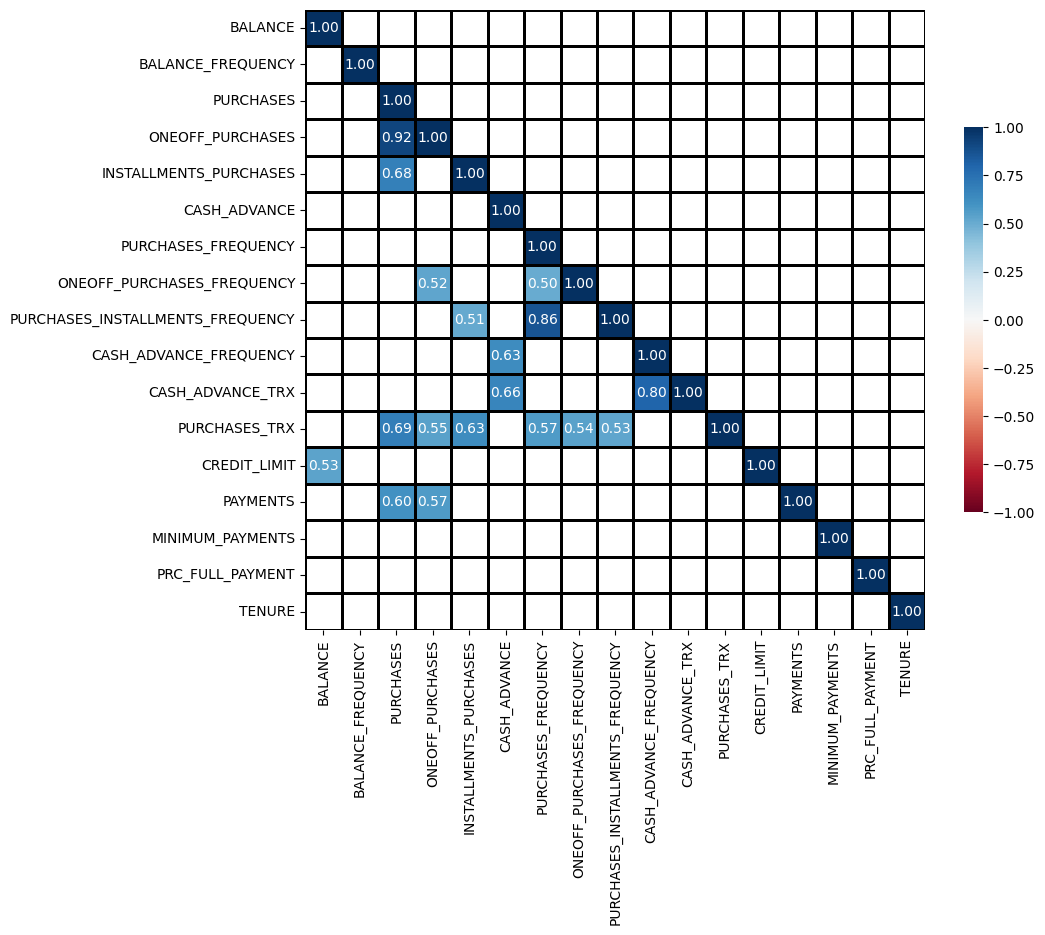

In [17]:
HeatmapPlot(df.select_dtypes(include='number').corr(), figsize=(10, 10), threshold=.5);

In [18]:
# def PlotBoxs(df, n_cols = 1, figsize=(20, 5)):
#     num_cols = df.select_dtypes(include='number').columns
#     n_rows = int(np.ceil(len(num_cols) / n_cols))
#     fig, axes = plt.subplots(n_rows, n_cols,figsize=figsize)
#     fig.suptitle("Box Plotting Numerical Columns", fontweight='bold')

#     axes = axes.flatten()
#     for i, col in enumerate(num_cols):
#         plt.sca(axes[i])
#         sns.boxplot(df, x=col)
#         plt.title(col.replace("_" ," ").title())
#     plt.tight_layout(pad=.5)
#     # fig.subplot_tool()

# PlotBoxs(df, 2, (20, 20))


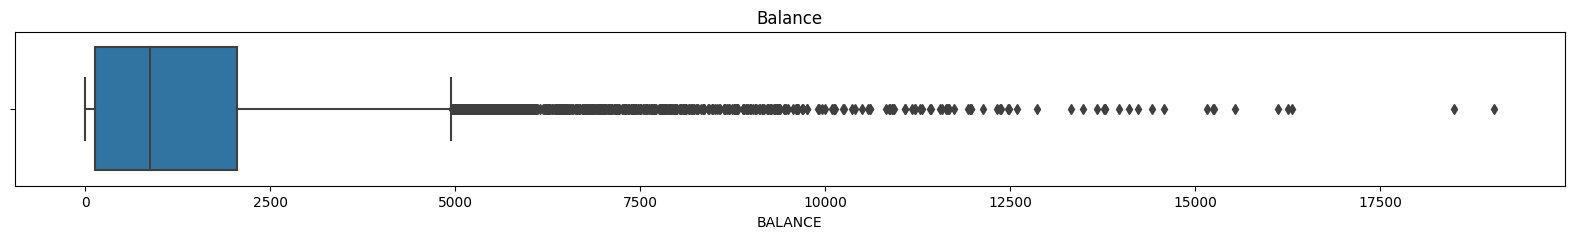

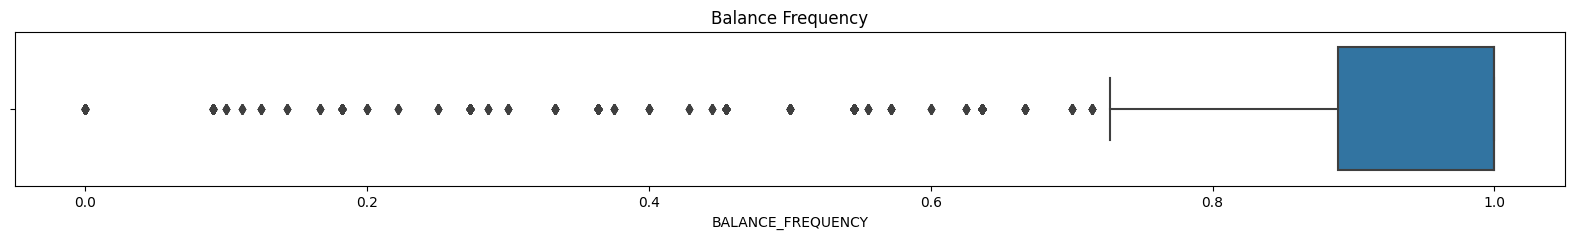

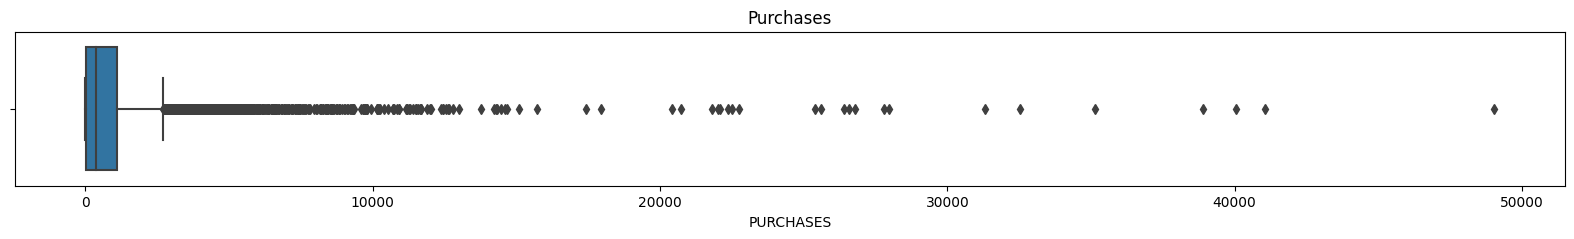

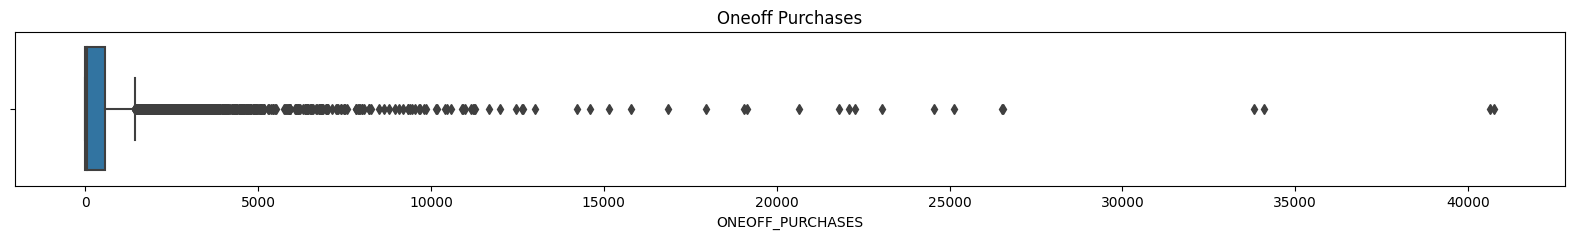

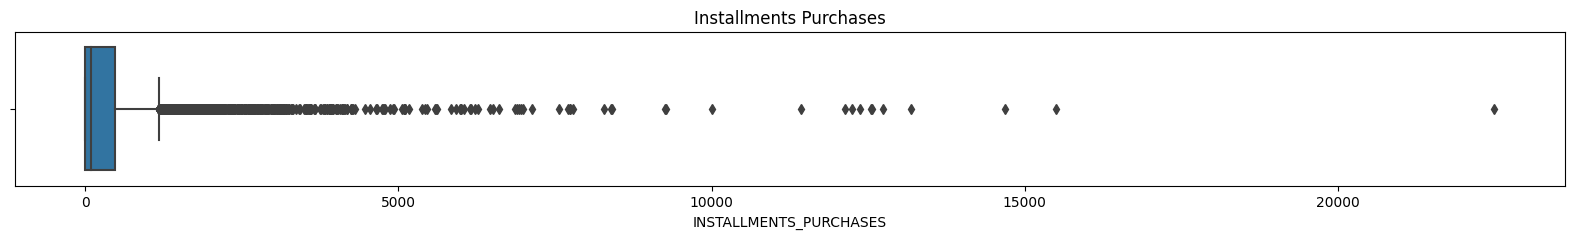

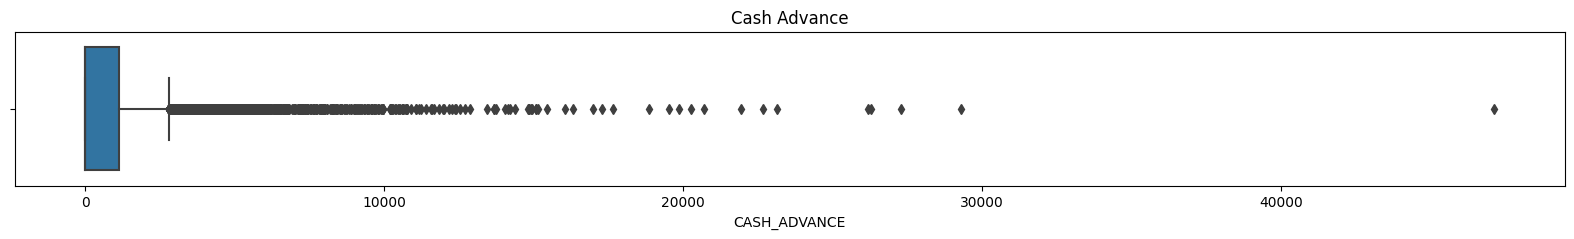

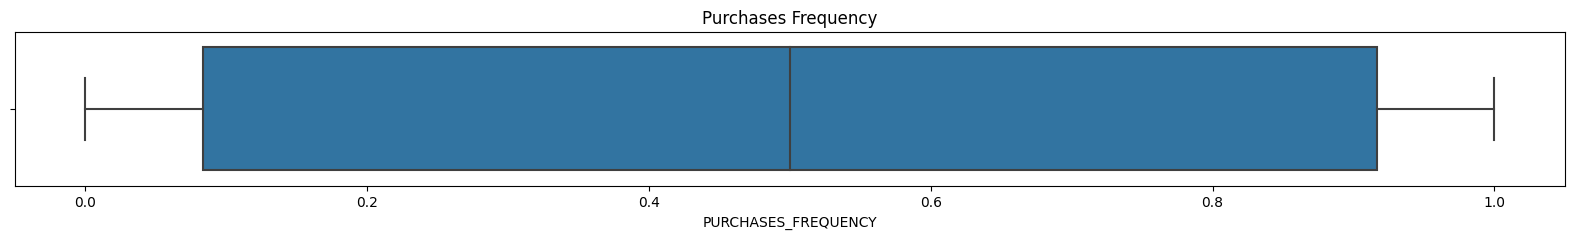

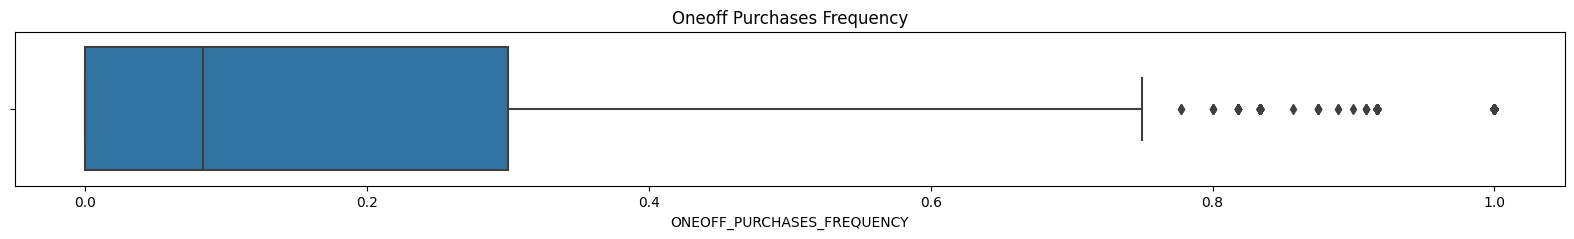

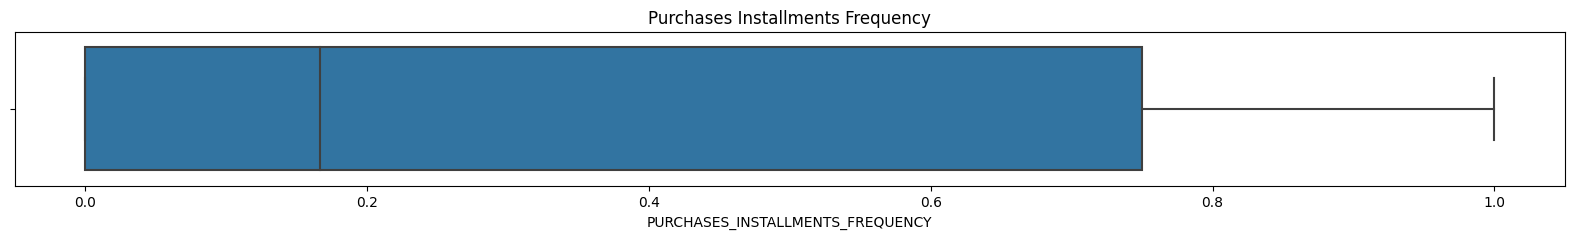

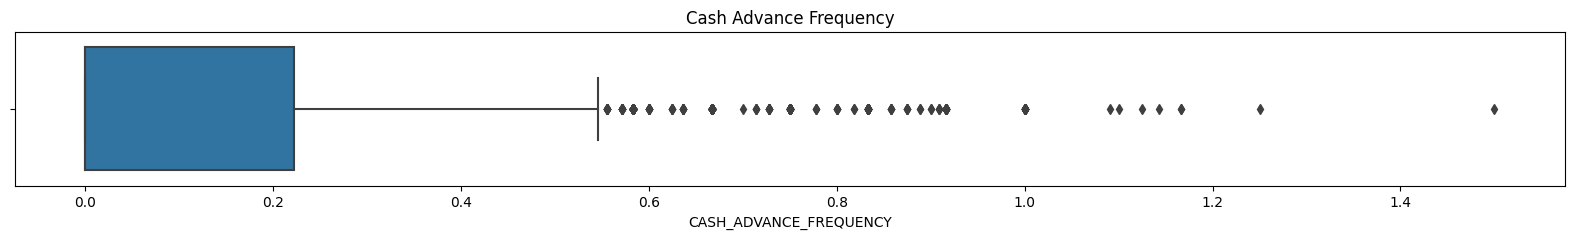

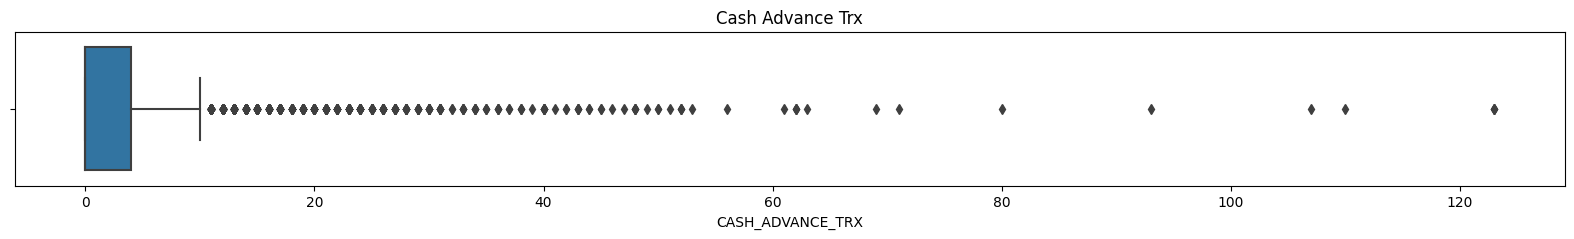

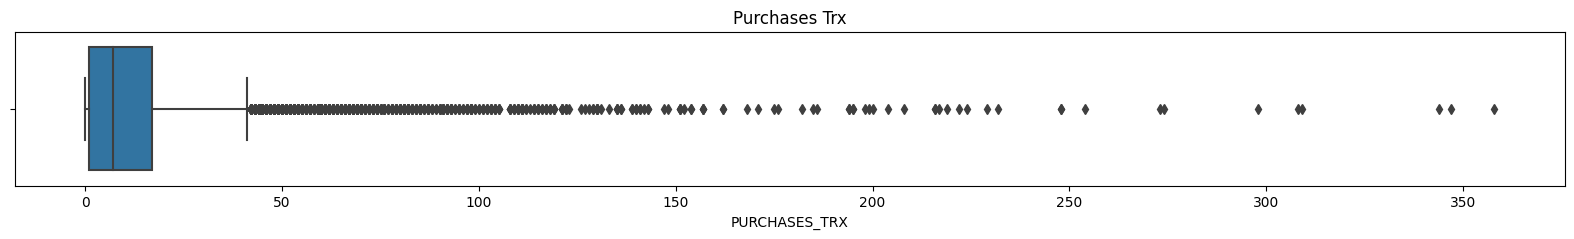

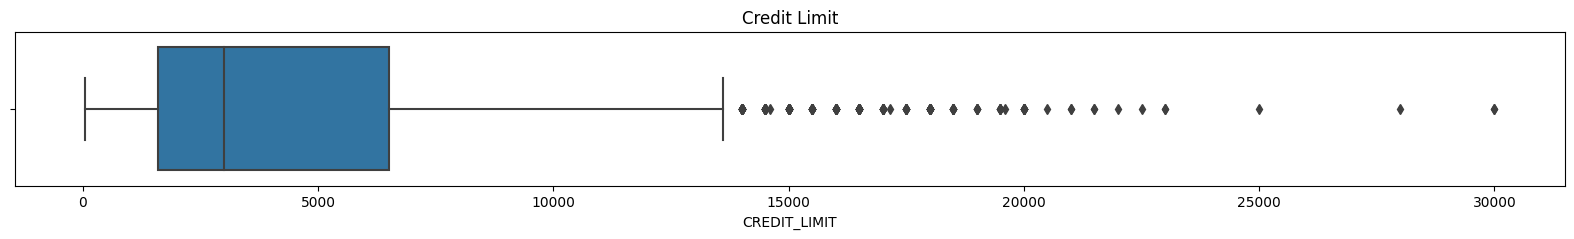

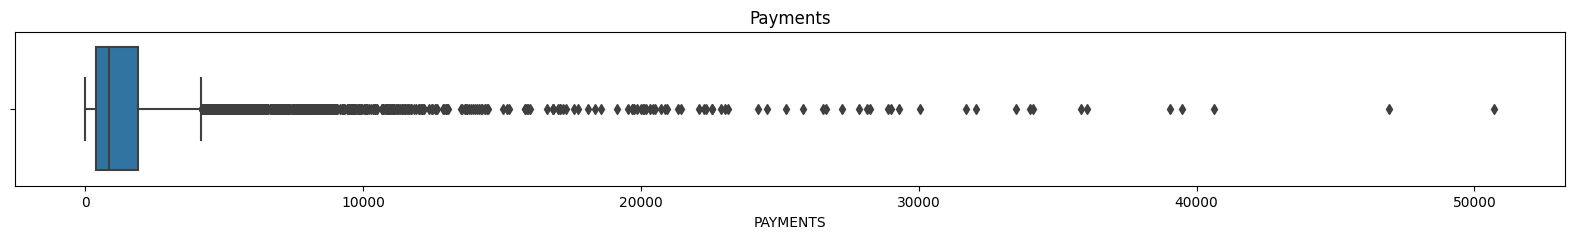

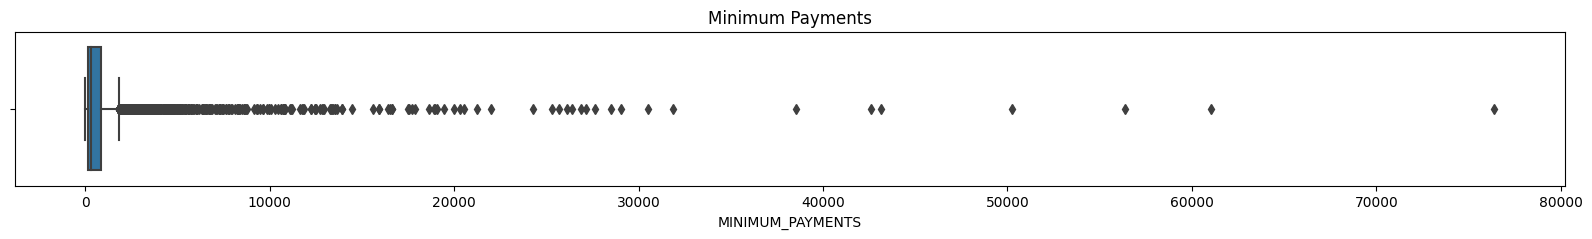

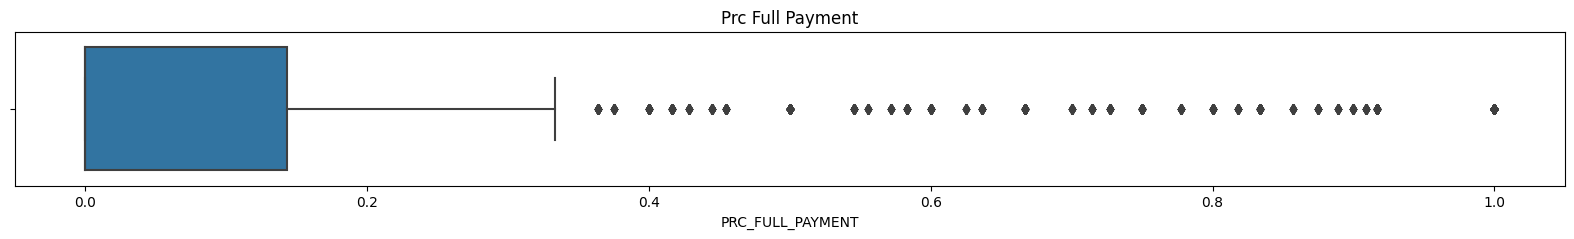

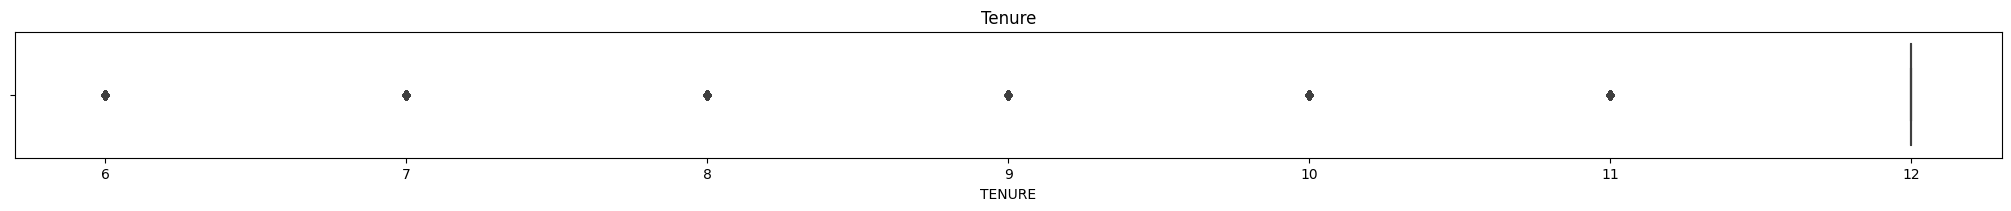

In [19]:
def PlotBoxs(df, figsize=(20, 5)):
    num_cols = df.select_dtypes(include='number').columns

    for col in num_cols:
        plt.figure(figsize=figsize)
        sns.boxplot(df, x=col)
        plt.title(col.replace("_", " ").title())
    plt.tight_layout(pad=.3)
PlotBoxs(df, (20, 2))


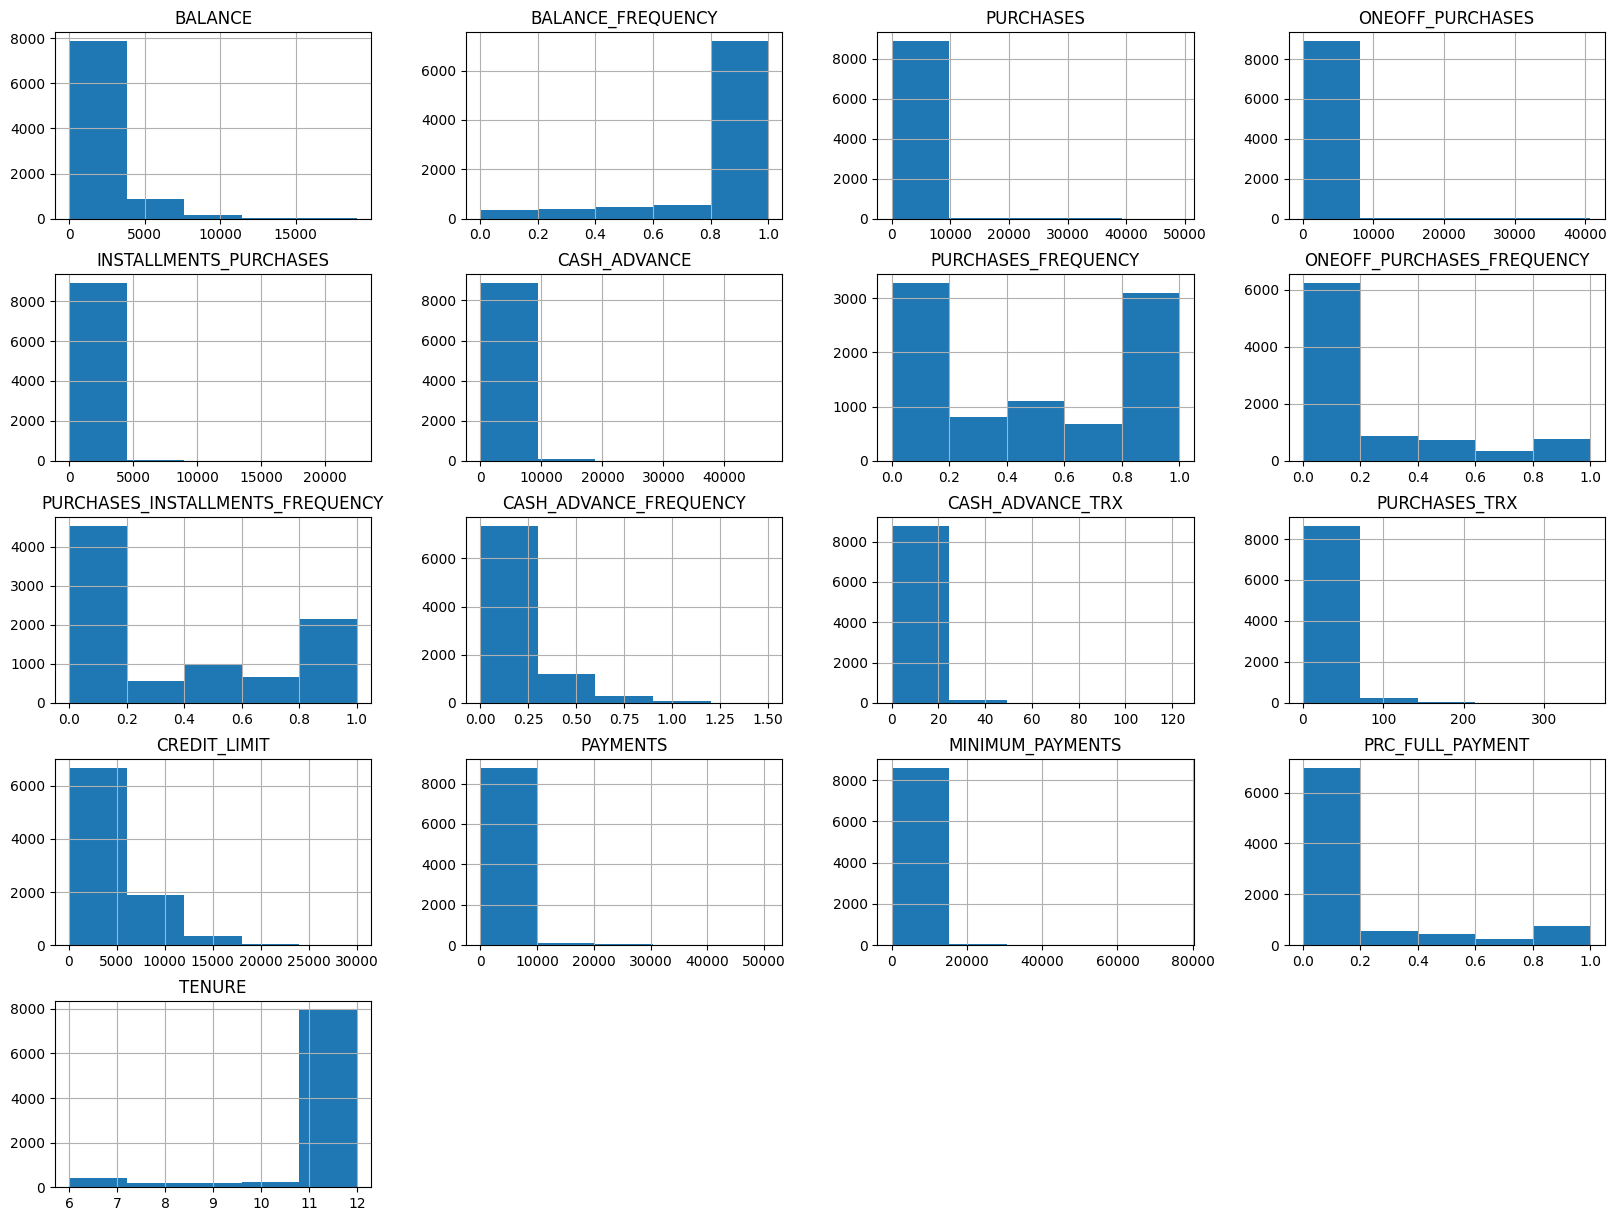

In [20]:
df.select_dtypes(include='number').hist(bins=5, figsize=(20, 15), layout=(5, 4));

<a href="#toc" style="background-color: #dda15e; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>
<a id="2.3"></a>
## <b>C. <span style='color:#dda15e'>Data Pre-processing</span></b> 

### Define below all the issues that we had found in the previous part
1- Null values in columns (CREDIT_LIMIT, MINIMUM_PAYMENTS)          <br>
2- Different Scales and Outliers         <br>
3- Skeweness of the columns          <br>

In [21]:
#make a copy for the original dataset
df_copy=df.copy()
df_copy.drop(columns=['CUST_ID'], inplace=True)

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

##### Handling the null value in credit limit
After investigation, we found that we can't estimate the credit limit from the given data as it's an internal process of the bank.

So we decided to remove the row containing the null in credit limit.

In [22]:
#solution
df_copy = df_copy[df_copy['CREDIT_LIMIT'].notna()]

In [23]:
#test
df_copy['CREDIT_LIMIT'].isna().sum()

0

##### Handling the null value in minimum payments
After investigation, we found that we can't estimate the minimum payments from the given data as there is missing data to calculate the minimum paymetents which is Minimum Payment Rate.

So we decided to impute this column with an Iterative imputer. (still experimental for the sake of reusability we will use KNNImputer)

Drop the nulls will perform better after testing.

In [24]:
#solution
# num_cols = df_copy.select_dtypes(include='number').columns
# knn = KNNImputer()
# df_copy[num_cols] = knn.fit_transform(df_copy[num_cols])

# df_copy = df_copy[df_copy['MINIMUM_PAYMENTS'].notna()].shape
df_copy.dropna(axis=0, inplace=True)

In [25]:
#test
print(f"Null Count is the data : {df_copy.isna().sum().sum()}")

Null Count is the data : 0


**Second issue**

we need to make the scale of the different columns in near ranges. While we are scaling the data we need to notice the outlier and consider them.
The outliers are necesary part of the data that we can't remove. So we need to handle them differentlly.

**<a href=#2.4>Handled in Section 2.D</a>**

<a href="#toc" style="background-color: #dda15e; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>
<a id="2.4"></a>
## <b>D. <span style='color:#dda15e'>🏎 Features Transformation</span></b> 

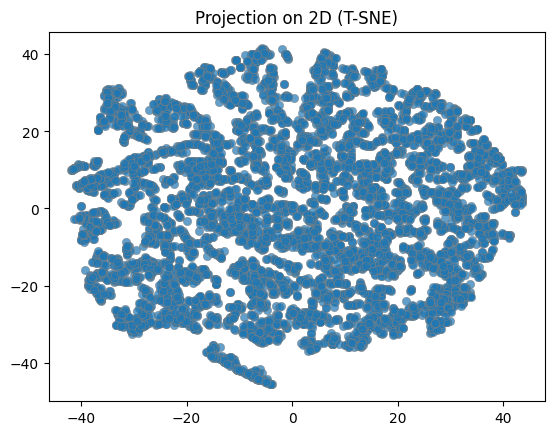

In [26]:
df_2d = TSNE_2D(df_copy)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

#### Robust Scaler

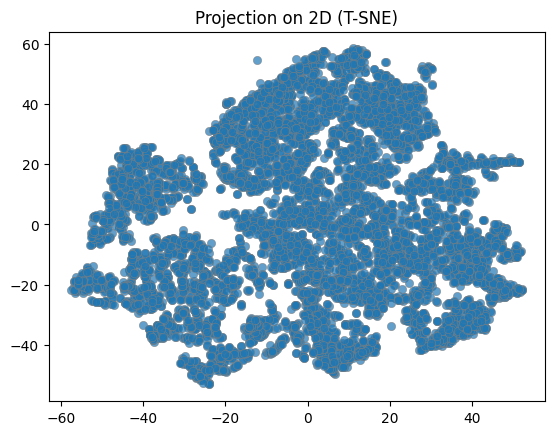

In [27]:
robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(df_copy)
robust_df = pd.DataFrame(robust_df, index=df_copy.index, columns=df_copy.columns)
robust_2d = TSNE_2D(robust_df, perplexity=50, n_iter=700)

#### Log Transformation

In [31]:
log_df = df_copy + .05
log_df = log_df.apply(np.log)
# log_df = df_copy.apply(np.log1p)

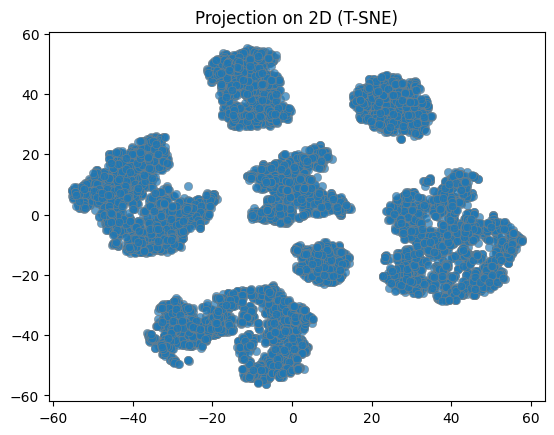

In [32]:
log_2d = TSNE_2D(log_df, 50, 700)

Answer here:

- **log Transformation** is the best transfomation on the data as when visualized with t-sne it gives us more seprable clusters.
- **Standard and Min-Max scalers** are not suitable at all for this data as the data contain extrem outliers, and these scalers doesn't perform well with them.
- **Robust scaler** is great with dealing with outliers, but when visualized with t-sne, the data wasn't cultered well.

🚀 So We Go With ***Log Transformation***

3. <a href="#3">Clustring Algorithms</a>
    1. <a href='#3.1'> K-Means</a>
    2. <a href='#3.2'> Hierarchical</a>
    3. <a href='#3.3'> DBSCAN</a>
    4. <a href='#3.4'> Gaussian Mixiture(**EM**)</a>
<a id="3"></a>
    
# <b>3- <span style='color:#bc6c25'>Clustring Algorithms</span></b> <!-- E1B12D -->

<a href="#toc" style="background-color: #dda15e; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>
<a id="3.1"></a>
## <b>A. <span style='color:#dda15e'>⚙ K-Means</span>

#### 1- Custom-Made K-Means

In [ ]:
def kMeansInitCentroids(X, K):
    m = X.shape[0]
    idx = np.random.choice(m, K, replace=False)
    centroids = X[idx]

    return centroids

def computeCentroids(X, idx, K=2):

    n = X.shape[1]
    centroids = np.zeros((K, n))

    for i in range(K):
        cluster_points = X[idx == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)

    return centroids

def findClosestCentroids(X, centroids):
    m = X.shape[0]
    closest_centroids = np.zeros(m)

    for i in range(m):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        closest_centroids[i] = np.argmin(distances)

    return closest_centroids


In [ ]:
def k_means(X, k):
    centroids = kMeansInitCentroids(X, k)
    idx = findClosestCentroids(X, centroids)
    centroids = computeCentroids(X, idx, k)

    return centroids, idx

In [ ]:
centroids, idx = k_means(np.array(log_df), 7)

In [ ]:
TSNE_2D_VIS(log_2d, idx, "Custom K-Means visualized with T-SNE (Log)")

#### 2- SKLearn K-Means
#### 5- Using different techniques for scaling

In [33]:
def KMeans_Plot(base, _2d, k, data_type='Original'):
    km = KMeans(n_clusters=k)
    km = km.fit(base)
    labels = km.labels_

    score = silhouette_score(base, labels)
    TSNE_2D_VIS(_2d, labels, km_fmt.format(k=k, data_type=data_type, score=score))

##### No Transformation

In [ ]:
KMeans_Plot(df_copy, df_2d, 7)

##### Robust Scaler

In [ ]:
KMeans_Plot(robust_df, robust_2d, 7, 'Robust')

##### Log Transformation

In [ ]:
KMeans_Plot(log_df, log_2d, 7, 'Log')

#### 3- ⏰ Optimal K

##### [The Elbow & Silhouette](https://www.youtube.com/watch?v=ARjx__t5OCI)

**`The Silhouette Score`** is calculated using the `mean intra-cluster distance (a)` and the `mean nearest-cluster distance (b) for each sample`.

The Silhouette Coefficient for a sample is **`(b - a) / max(a, b)`**.

To clarify, **`b` is the distance between a sample and the nearest cluster that the sample is not a part of**.

Note that Silhouette Coefficient is only defined if number of labels is `2 <= n_labels <= n_samples - 1`.

The **best** value is **`1`** and the **worst** value is **`-1`**.

Values near `0` indicate `overlapping` clusters.

`Negative values` generally indicate that a `sample has been assigned to the wrong cluster`, as a different cluster is more similar.

In [34]:
def PlotElbow(krange, wcss):
    plt.figure(figsize=(10,5))
    plt.plot(krange, wcss, marker = 'o' )
    plt.xlabel('Number of Clusters K')
    plt.ylabel('Within-Cluster-Sum of Squared Errors (Inertia)')
    plt.grid()
    plt.xticks(krange)
    plt.title("Elbow Method");

def PlotSilhouette(krange, scores):
    plt.figure(figsize=(10,5))
    plt.plot(krange, scores, marker = 'o' )
    plt.xlabel('Number of Clusters K')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.xticks(krange)
    plt.title("Silhouette Method");

In [35]:
def Elbow_Silh(df, low, high):
    wcss = []
    silhouette_scores = []
    krange = range(low, high)
    for k in krange:
        model = KMeans(n_clusters=k)
        model.fit(df)

        w = model.inertia_
        s = silhouette_score(df, model.labels_)
        wcss.append(w)
        silhouette_scores.append(s)
    return krange, wcss, silhouette_scores

##### Gap Statistics

##### Robust Scaled

In [ ]:
opt = OptimalK()
opt_k = opt(robust_df, cluster_array=range(2, 10))
opt_k

In [ ]:
krange, wcss, silhouette_scores = Elbow_Silh(robust_df, 2, 15)
PlotElbow(krange, wcss)

In [ ]:
PlotSilhouette(krange, silhouette_scores)

##### Log Transformed

In [ ]:
opt = OptimalK()
opt_k = opt(log_df, cluster_array=range(2, 10))
opt_k

In [ ]:
krange, wcss, silhouette_scores = Elbow_Silh(log_df, 2, 15)

In [ ]:
PlotElbow(krange, wcss)

In [ ]:
PlotSilhouette(krange, silhouette_scores)

- With Robust:
            we noticed that ⤵
                - In Elbow, There we no clear elbow point as the curve is moving smoothly.
                - In Silhouette, The maximum is at 2.
            ⭐ silhouette score can be misleading when the data is not easily separable.

- With Log:
            we noticed that ⤵
                - In Elbow, The elbow point is clear at 7.
                - In Silhouette, The maximum is at 7.
            ⭐It's clear now that the optimal k for this data is 7 from the 2 methods.

<a href="#toc" style="background-color: #dda15e; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>
<a id="3.2"></a>
## <b>B. <span style='color:#dda15e'>🕸 Hierarchical</span>

### 🐉 Dendrogram


Dendrograms help in showing progressions
as clusters are merged.


A dendrogram is a branching diagram that
demonstrates how each cluster is
composed by branching out into its child
nodes

Before we start the training process we need to specify 3 paramters:<br>
1- **Linkage criteria** : The linkage criterion determines the distance between two clusters:

- `Complete` : based on two farthest objects
- `Single` : based on two closest objects
- `Average` : based on the arithmetic mean of all objects
- `Centroid` : based on the geometric mean of all objects
- `Median` : based on the median of all objects
- `Ward` : based on the sum of squares within all clusters. (Similar to K-means objective)

        - Single and Complete are not stable as if we added or removed some points the overall clustring will change.
        - Average and Centroids are more stable.

2- **Distance function**:
- Euclidean Distance
- Manhattan Distance
- Mahalanobis distance

3- Number of clusters


 ***Number of clusters***

Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [36]:
def DendrogramPlot(df, method, metric, orient):
    plt.figure(figsize=(10, 7))
    plt.title(f"Dendrogram of Hierarchical Clustering with {method} method and {metric} metric")
    merging = shc.linkage(y=df ,method = method, metric=metric)
    dend = shc.dendrogram(merging, orientation=orient)
    return merging

⚠ Limitations of hierarchical clustering (Linkage method):

- **Quadratic increase** of `runtime` with data points.

- **Not feasible** for `large datasets`.

In [ ]:
merging = DendrogramPlot(log_df, 'ward', 'euclidean', 'top')

In [ ]:
labels = shc.fcluster(merging, t=7, criterion='maxclust')

In [ ]:
TSNE_2D_VIS(log_2d, labels, title=f"Hierarchical Clustring (Ward, Euclidean) [{silhouette_score(log_df, labels):.2f}]")

In [ ]:
DendrogramPlot(log_df, 'complete', 'euclidean', 'top');

In [ ]:
# DendrogramPlot(log_df, 'single', 'euclidean', 'top');

In [ ]:
# DendrogramPlot(log_df, 'average', 'euclidean', 'top');

In [ ]:
# DendrogramPlot(log_df, 'average', 'cosine', 'top');

In [ ]:
DendrogramPlot(log_df, 'complete', 'cosine', 'top')

### 🍴 Agglomerative Clustring

In [37]:
def AggClusteringLabels(df, n, metric='euclidean', linkage='ward'):
    agg = AgglomerativeClustering(n_clusters=n, metric=metric, linkage=linkage)
    agg = agg.fit(df)
    labels = agg.labels_
    return labels

def AggClusteringPlot(df, labels, title):
    TSNE_2D_VIS(df, labels, title)

def AggClustering(base, _2d, n, df_name="Original", metric='euclidean', linkage='ward'):
    labels = AggClusteringLabels(base, n, metric, linkage)
    score = silhouette_score(base, labels)
    AggClusteringPlot(_2d, labels,
                      hc_fmt.format(df_name=df_name, linkage=linkage, metric=metric, score=score))
    return labels


##### Original

In [ ]:
AggClustering(df_copy, df_2d, 7);

##### Robust Scaled

In [ ]:
AggClustering(robust_df, robust_2d, 7, 'Robust');

##### Log Scaled

In [ ]:
AggClustering(log_df, log_2d, 7, 'Log');

<a href="#toc" style="background-color: #dda15e; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>
<a id="3.3"></a>
## <b>C. <span style='color:#dda15e'>✨ DBSCAN</span>

In [38]:
def DBSCAN_Plot(base, _2d, eps=.5, min_samples=5, dtype='Original'):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db = db.fit(base)
    labels = db.labels_
    try:
        score = silhouette_score(base, labels)
    except:
        print("Number of labels is 1. Valid values are 2 to n_samples - 1")
        score = np.inf

    TSNE_2D_VIS(_2d, labels, db_fmt.format(dtype=dtype, score=score))
    return labels

##### Original

In [ ]:
DBSCAN_Plot(df_copy, df_2d, eps=2500, min_samples=250, dtype='Original');

In [ ]:
DBSCAN_Plot(df_copy, df_2d, min_samples=300, dtype='Original');

##### Robust

In [ ]:
DBSCAN_Plot(robust_df, robust_2d, eps=4.5, min_samples=30, dtype='Robust');

In [ ]:
DBSCAN_Plot(robust_df, robust_2d, eps=4, min_samples=300, dtype='Robust');

##### Log

In [ ]:
DBSCAN_Plot(log_df, log_2d, eps=4, min_samples=300, dtype='Log');

In [ ]:
DBSCAN_Plot(log_df, log_2d, eps=4.5, min_samples=300, dtype='Log');

### PCA

##### Original

Explained Variance of PCA

In [ ]:
test = PCA()
explained_var = test.fit(df_copy).explained_variance_ratio_
sns.barplot(explained_var)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Features');

In [ ]:
pca = PCA(n_components=.95)
pca_df = pca.fit_transform(df_copy)
print(f"N. Components -> {pca.n_components_}")

In [ ]:
TSNE_2D(pca_df);

#### Robust

In [ ]:
nc = .95
pca_robust = PCA(n_components=nc)
pca_robust_df = pca_robust.fit_transform(robust_df)
print(f"N. Components -> {pca_robust.n_components_}")
pca_robust_2d = TSNE_2D(pca_robust_df, title=f"Applying PCA ({nc}) visualized with T-SNE");

##### DBSCAN with PCA

In [ ]:
DBSCAN_Plot(pca_robust_df, pca_robust_2d, 3, 200, 'PCA-Robust');

#### Log

N. Components -> 5


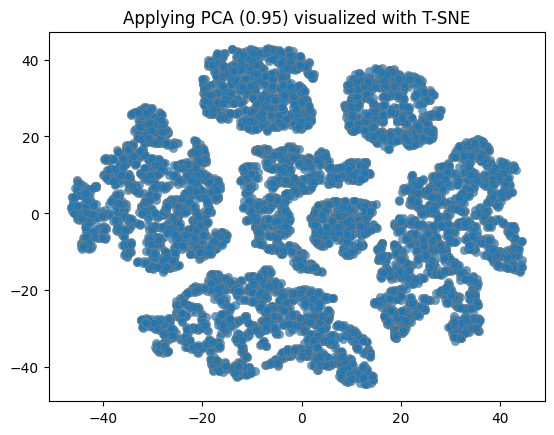

In [40]:
nc = .95
pca = PCA(n_components=nc)
pca_log_df = pca.fit_transform(log_df)
print(f"N. Components -> {pca.n_components_}")
pca_log_2d = TSNE_2D(pca_log_df, title=f"Applying PCA ({nc}) visualized with T-SNE");

In [ ]:
krange, wcss, silhouette_scores = Elbow_Silh(pca_log_df, 2, 15)
PlotElbow(krange, wcss);
plt.figure();
PlotSilhouette(krange, silhouette_scores);

##### K-Means with PCA

In [ ]:
KMeans_Plot(pca_log_df, pca_log_2d, 7, 'PCA-Log')

##### DBSCAN with PCA

In [ ]:
DBSCAN_Plot(pca_log_df, pca_log_2d, 3, 200, 'PCA-Log');

### Kernal PCA

In [39]:
def KMeans_KPCA_Plot(base, k_clusters, nc=None, kernel='poly', dtype='Original'):
    kpca = KernelPCA(n_components=nc, kernel=kernel)
    kpca_df = kpca.fit_transform(base)

    labels = KMeans(n_clusters=k_clusters).fit(kpca_df).labels_

    score = silhouette_score(kpca_df, labels)

    kpca_2d = TSNE_2D(kpca_df, hue=labels,
            title=km_kpca_fmt.format(kernel=kernel, dtype=dtype, score=score));
    return kpca_df, kpca_2d, labels

##### kernel PCA (Poly)




In [ ]:
kpca_log_df, kpca_log_2d, kpca_labels = KMeans_KPCA_Plot(log_df, 7, nc=7, kernel='poly', dtype='Log')

##### Kernel PCA (Cosine)

In [ ]:
kpca_log_cos_df, kpca_log_cos_2d, kpca_cos_labels = KMeans_KPCA_Plot(log_df, 7, nc=5, kernel='cosine', dtype='Log')

<a href="#toc" style="background-color: #dda15e; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a>
<a id="3.4"></a>
## <b>D. <span style='color:#dda15e'>🌌 Gaussian Mixture(**EM**)</span>

In [ ]:
def GMPlot(base, _2d, n=2, type='Original'):
    gm = GaussianMixture(n_components=n)
    gm = gm.fit(base)
    labels = gm.predict(base)
    score = silhouette_score(base, labels)
    TSNE_2D_VIS(_2d, labels, gm_fmt.format(type, score))

#### Log

In [ ]:
GMPlot(log_df, log_2d, n=7, type='Log')

#### Robust

In [ ]:
GMPlot(robust_df, robust_2d, n=7, type='Robust')

#### PCA & Log

In [ ]:
GMPlot(pca_log_df, pca_log_2d, n=7, type='PCA-Log')

#### K-PCA & Log

In [ ]:
GMPlot(kpca_log_df, kpca_log_2d, n=7, type='KPCA-Log')

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method

<a id="4"></a>
# <b>4- <span style='color:#bc6c25'>📣 Clusters Analysis</span></b> <!-- E1B12D -->

## Models Summary

| **_Algorithm_**         	| **_Params_**                                          	| **_Data_** 	| **_Silhouette*100_** 	|
|-------------------------	|-------------------------------------------------------	|------------	|----------------------	|
| KMeans                  	| n_clusters=7                                          	| robust     	| 31                   	|
| KMeans                  	| n_clusters=7                                          	| log        	| 59                   	|
| KMeans                  	| n_clusters=7  && PCA(n_componets=.95)                 	| log        	| **65**               	|
| KMeans                  	| n_clusters=7  && KPCA(n_componets=7, kernel='poly')   	| log        	| 56                   	|
| KMeans                  	| n_clusters=7  && KPCA(n_componets=7, kernel='cosine') 	| log        	| **66**               	|
| KMeans                  	| n_clusters=7  && KPCA(n_componets=5, kernel='cosine') 	| log        	| **70**               	|
| AgglomerativeClustering 	| n_clusters=7, linkage=ward, metric=euclidean          	| original   	| 30                   	|
| AgglomerativeClustering 	| n_clusters=7, linkage=ward, metric=euclidean          	| robust     	| 30                   	|
| AgglomerativeClustering 	| n_clusters=7, linkage=ward, metric=euclidean          	| log        	| 59                   	|
| DBSCAN                  	| eps=4, min_samples=300                                	| robust     	| 54                   	|
| DBSCAN                  	| eps=4, min_samples=300                                	| log        	| 57                   	|
| DBSCAN                  	| eps=4, min_samples=300                                	| log        	| 58                   	|
| DBSCAN                  	| eps=3, min_samples=200 && PCA(n_componets=.95)        	| log        	| **65**               	|
| GaussianMixture         	| n_components=7                                        	| log        	| 41                   	|
| GaussianMixture         	| n_components=7  && PCA(.95)                           	| log        	| 41                   	|

## 🔭 Analysis

### Best Models

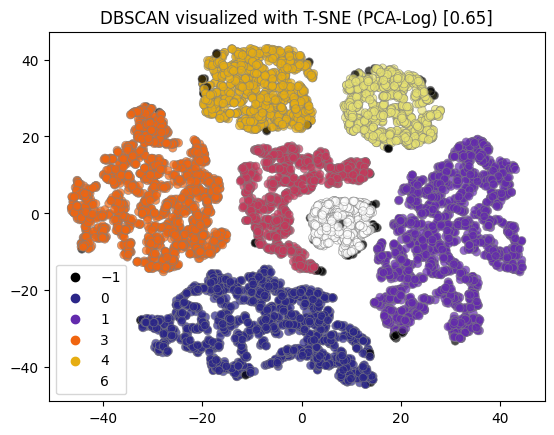

In [41]:
db_labels = DBSCAN_Plot(pca_log_df, pca_log_2d, 3, 200, 'PCA-Log');

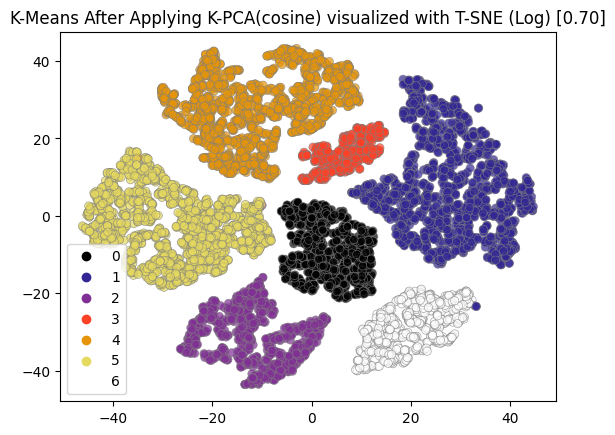

In [42]:
kpca_log_cos_df, kpca_log_cos_2d, km_labels = KMeans_KPCA_Plot(log_df, 7, nc=5, kernel='cosine', dtype='Log')

### Clean Sheet

In [43]:
new_df = df.copy()
new_df.drop(columns=['CUST_ID'], inplace=True)
new_df.dropna(inplace=True)

In [44]:
new_df['kmeans'] = km_labels
new_df['dbscan'] = db_labels

In [45]:
new_df['kmeans'].unique()

array([4, 1, 2, 5, 3, 0, 6], dtype=int32)

In [46]:
new_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'kmeans', 'dbscan'],
      dtype='object')

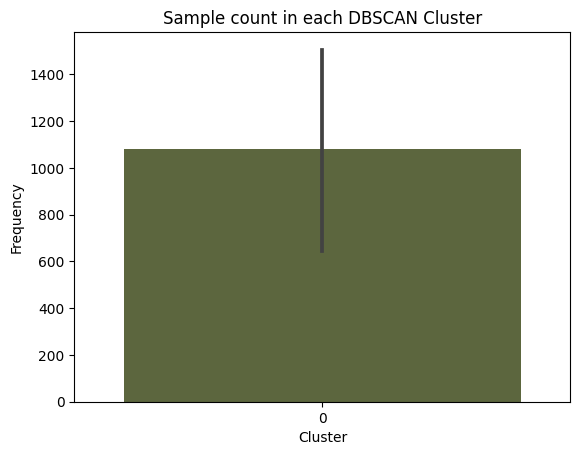

In [47]:
km_clust_count = new_df.groupby('dbscan').count()['BALANCE']
sns.barplot(km_clust_count, color='#606c38')
plt.title("Sample count in each DBSCAN Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frequency");

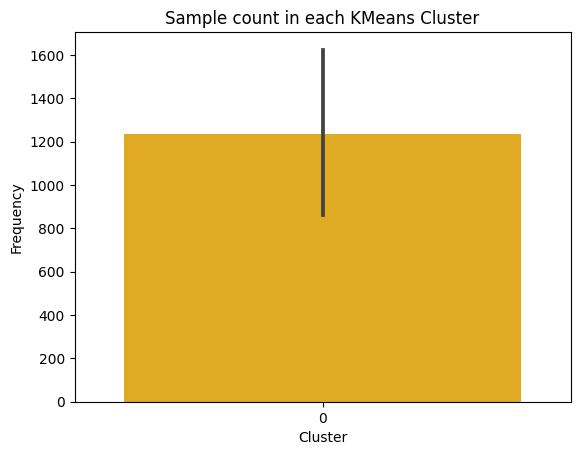

In [48]:
km_clust_count = new_df.groupby('kmeans').count()['BALANCE']
sns.barplot(km_clust_count, color='#ffb703')
plt.title("Sample count in each KMeans Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frequency");

<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

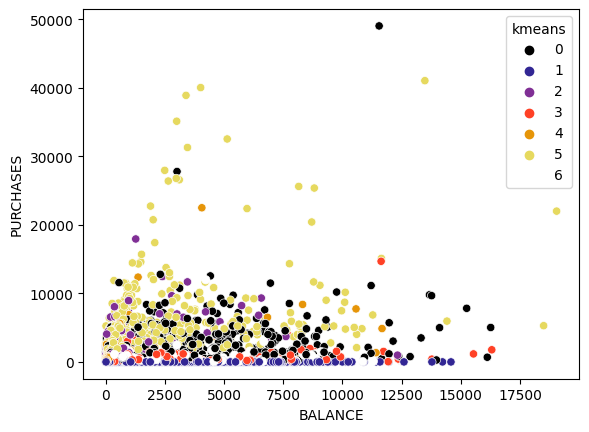

In [49]:
sns.scatterplot(data=new_df, x='BALANCE', y= 'PURCHASES', hue='kmeans', palette='CMRmap')

In [50]:
def Bar(df,Column_name,bins):
  plt.figure(figsize=(15,4))
  freq, bins, p = plt.hist(df[Column_name], bins=bins, rwidth=0.9)

  # x coordinate for labels
  bin_centers = np.diff(bins)*0.5 + bins[:-1]

  n = 0
  for fr, x, patch in zip(freq, bin_centers,p):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0],2)),
                xy = (x, height),
                xytext = (0,0.2),
                textcoords = "offset points",
                ha = 'center', va = 'bottom'
                )
    n = n+1
  plt.grid()
  plt.xticks(bins)
  plt.title(Column_name)
  plt.show;

## Cluster 0

In [51]:
clust0 = new_df[new_df['kmeans'] == 0]

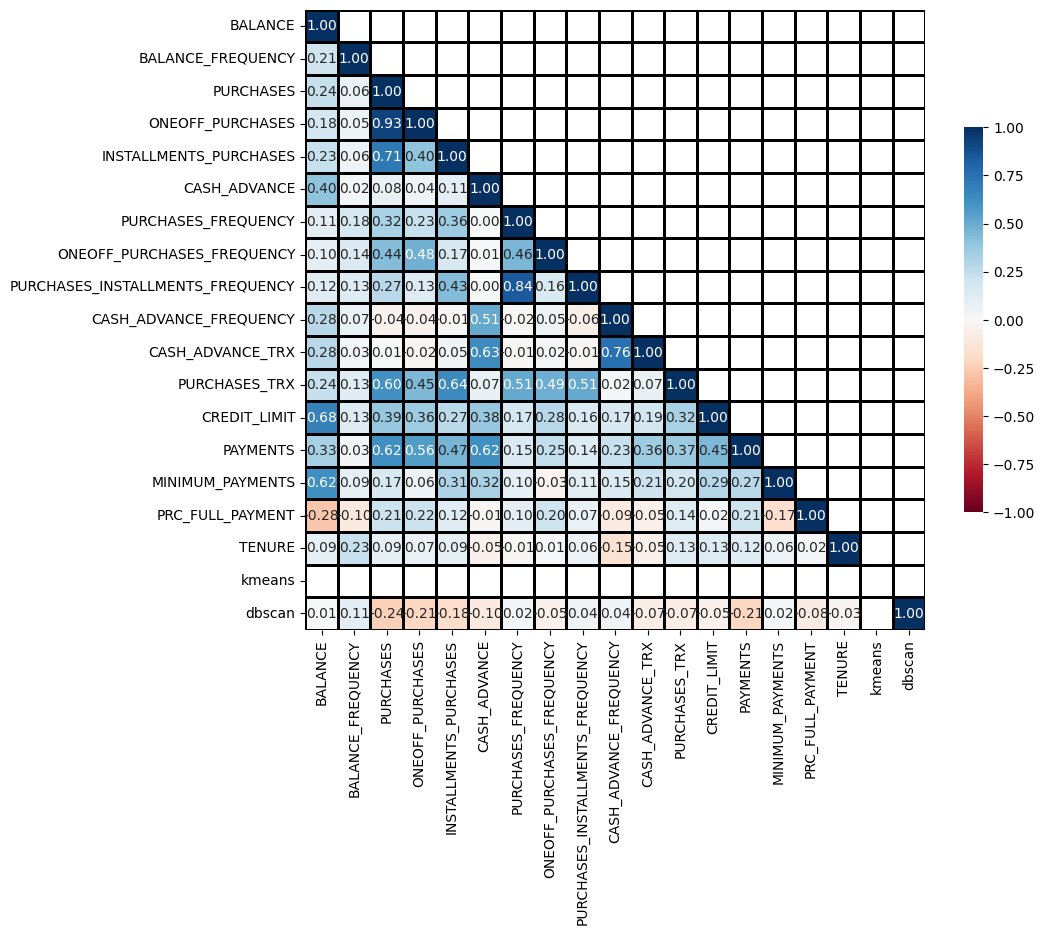

In [52]:
HeatmapPlot(clust0.select_dtypes(include='number').corr(), figsize=(10, 10));

<Axes: xlabel='PURCHASES', ylabel='INSTALLMENTS_PURCHASES'>

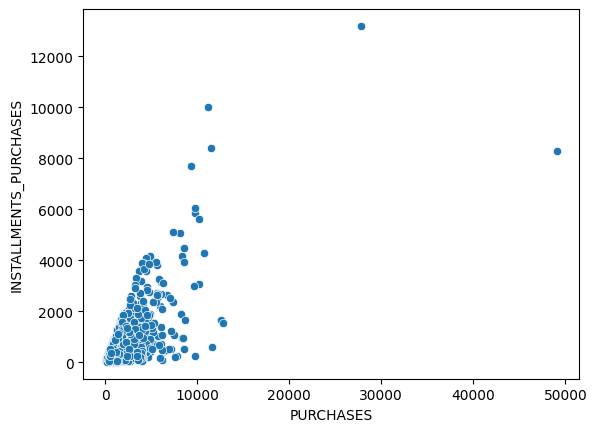

In [53]:
sns.scatterplot(clust0, x='PURCHASES', y='INSTALLMENTS_PURCHASES')

<Axes: xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

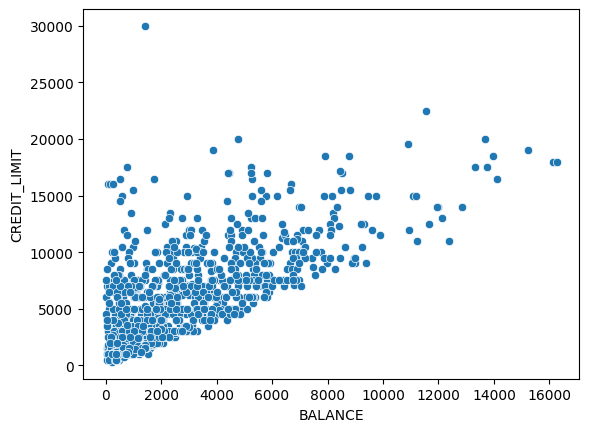

In [54]:
sns.scatterplot(clust0, x='BALANCE', y='CREDIT_LIMIT')

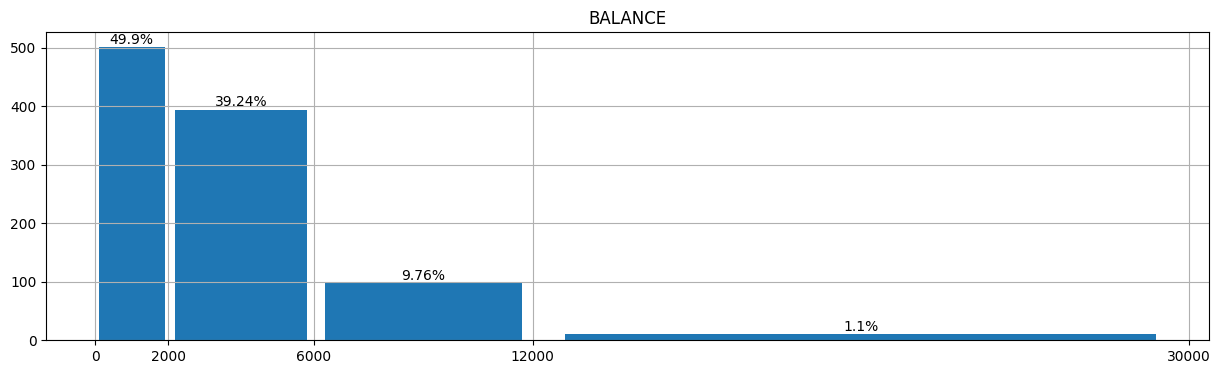

In [55]:
Bar(clust0, 'BALANCE', [0, 2000, 6000, 12000, 30000])

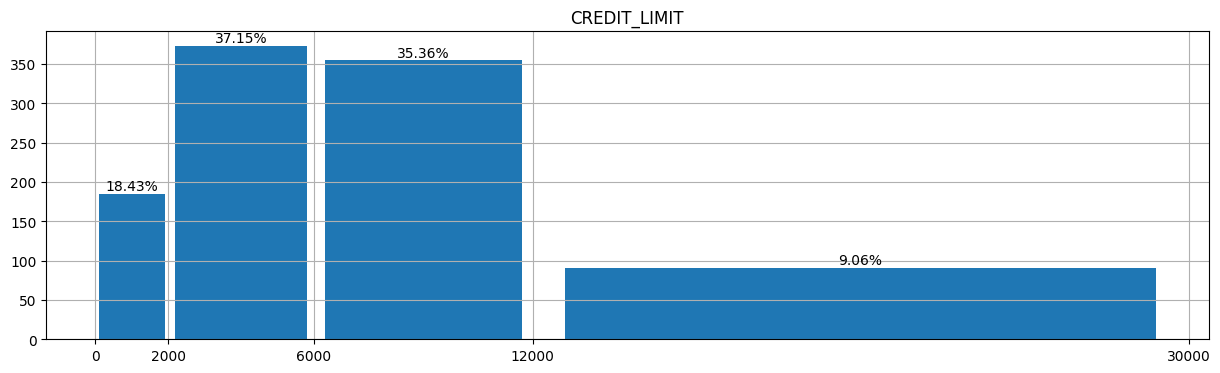

In [56]:
Bar(clust0, 'CREDIT_LIMIT', [0, 2000, 6000, 12000, 30000])

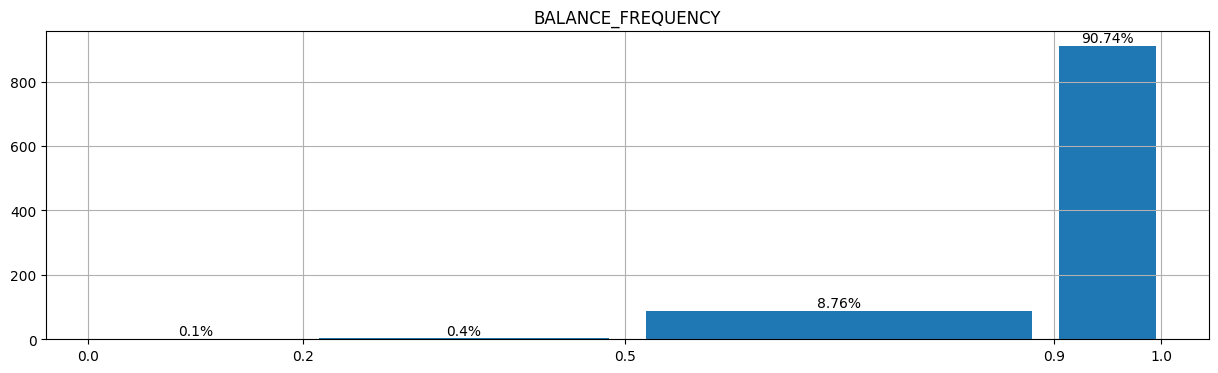

In [57]:
Bar(clust0, 'BALANCE_FREQUENCY', [0, .2, .5, .9, 1])

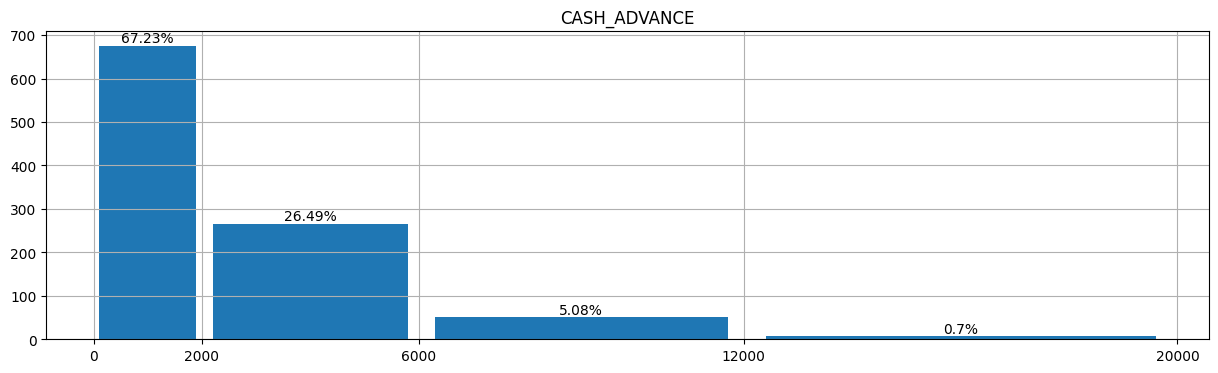

In [58]:
Bar(clust0, 'CASH_ADVANCE', [0, 2000, 6000, 12000, 20000])

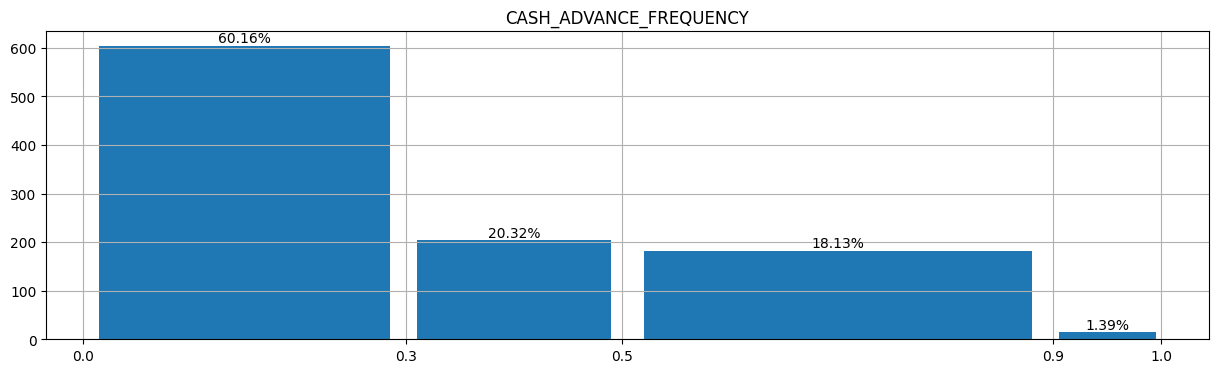

In [59]:
Bar(clust0, 'CASH_ADVANCE_FREQUENCY', [0, .3, .5, .9, 1])

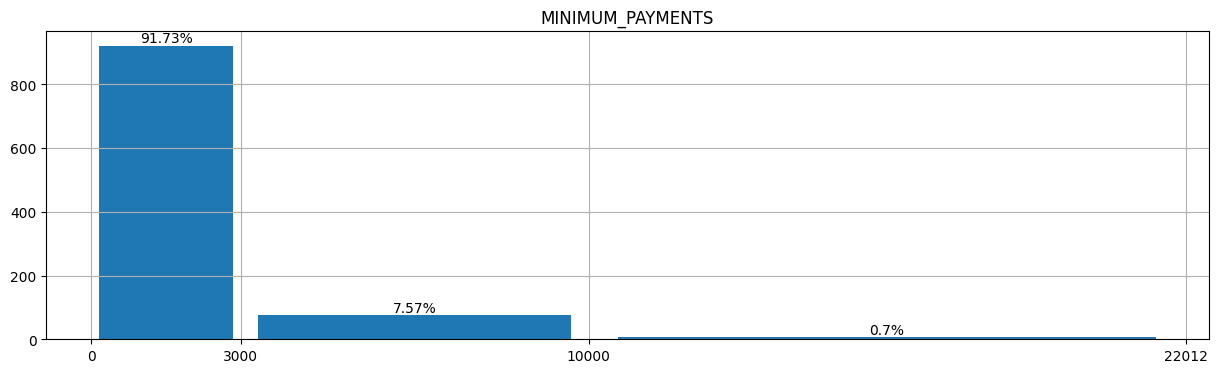

In [60]:
Bar(clust0, 'MINIMUM_PAYMENTS', [0, 3000, 10000, clust0['MINIMUM_PAYMENTS'].max()])

- All purchases are associated with installemnts
- Most of the balance in this cluster is less than 6000 (90%), and (56%) is under 2000.
- (95%) of the credit limit is under 12000.
- The balance updates continuously as 90% of the customers does.
- Most of the customers don't usually take cash in advance.
- The customers who take cash in advance usually take between 2000 and 6000.
- Most customers has a minimum payment each balanc cycle less than 3000.



## Cluster 1

In [61]:
clust1 = new_df[new_df['kmeans'] == 1]

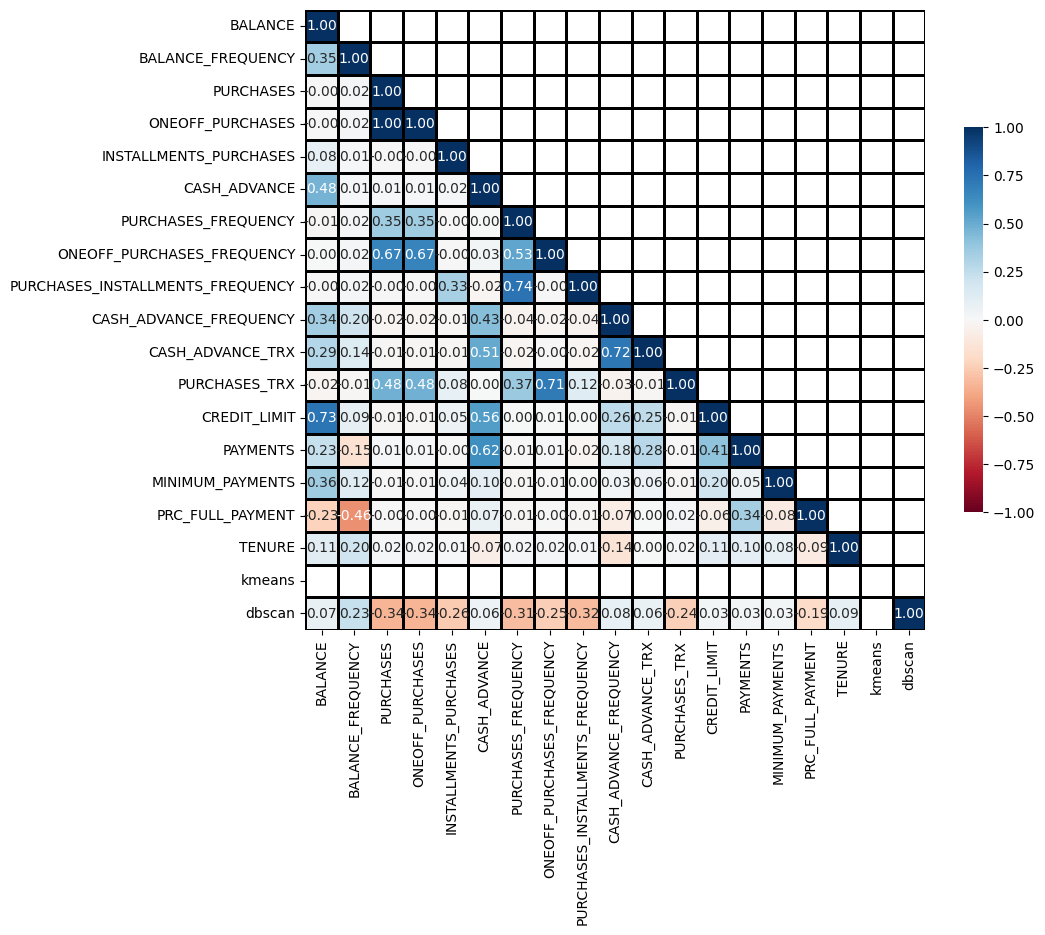

In [62]:
HeatmapPlot(clust1.select_dtypes(include='number').corr(), figsize=(10, 10));

<Axes: xlabel='PURCHASES', ylabel='ONEOFF_PURCHASES'>

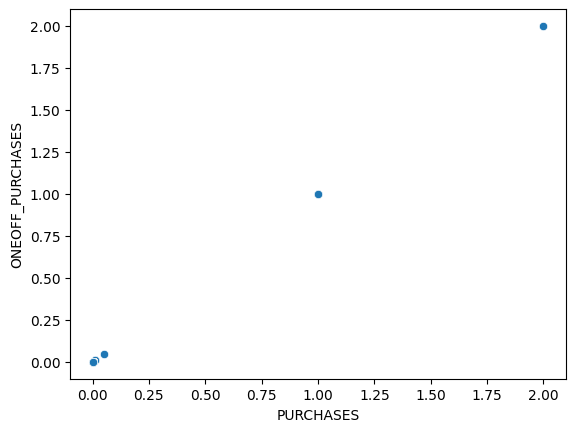

In [63]:
sns.scatterplot(clust1, x='PURCHASES', y='ONEOFF_PURCHASES')

<Axes: xlabel='PURCHASES', ylabel='PAYMENTS'>

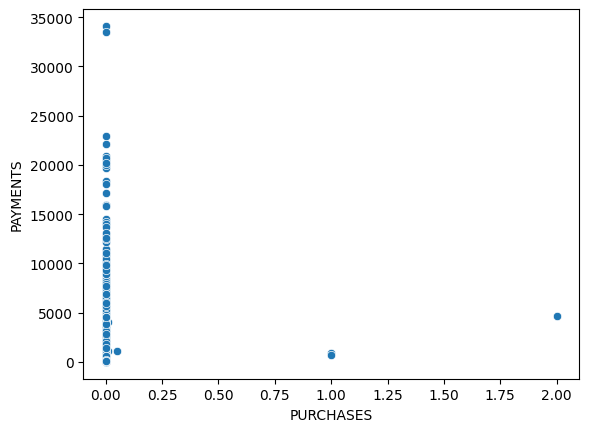

In [64]:
sns.scatterplot(clust1, x='PURCHASES', y='PAYMENTS')

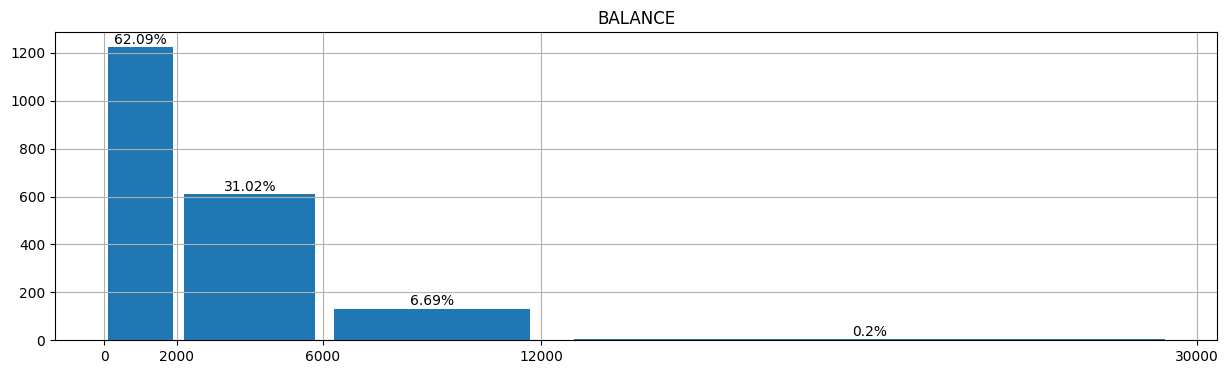

In [65]:
Bar(clust1, 'BALANCE', [0, 2000, 6000, 12000, 30000])

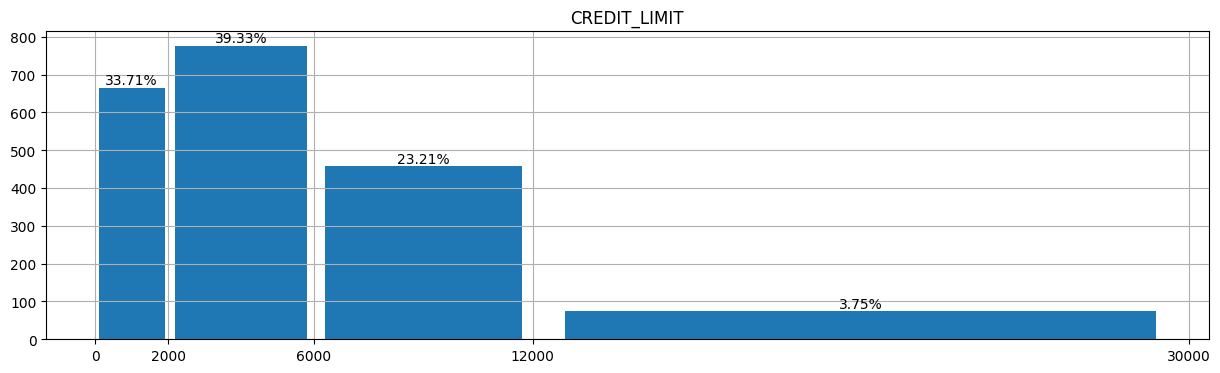

In [66]:
Bar(clust1, 'CREDIT_LIMIT', [0, 2000, 6000, 12000, 30000])

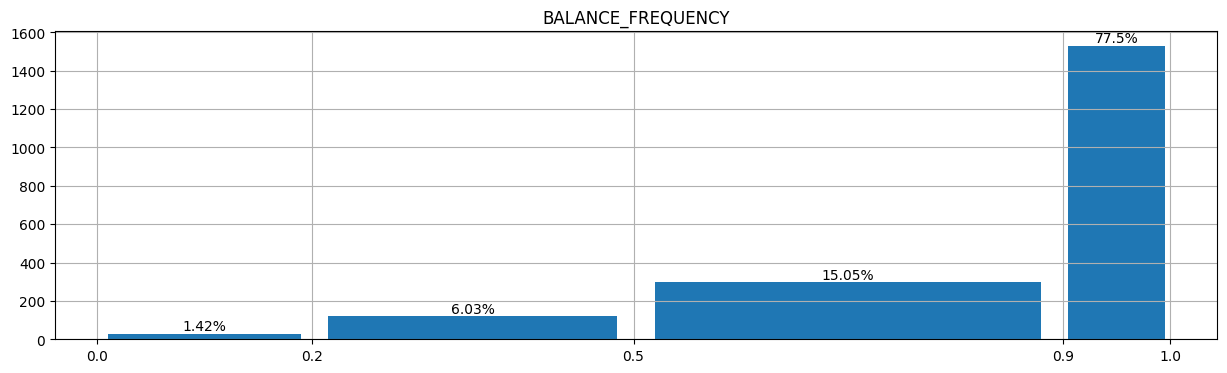

In [67]:
Bar(clust1, 'BALANCE_FREQUENCY', [0, .2, .5, .9, 1])

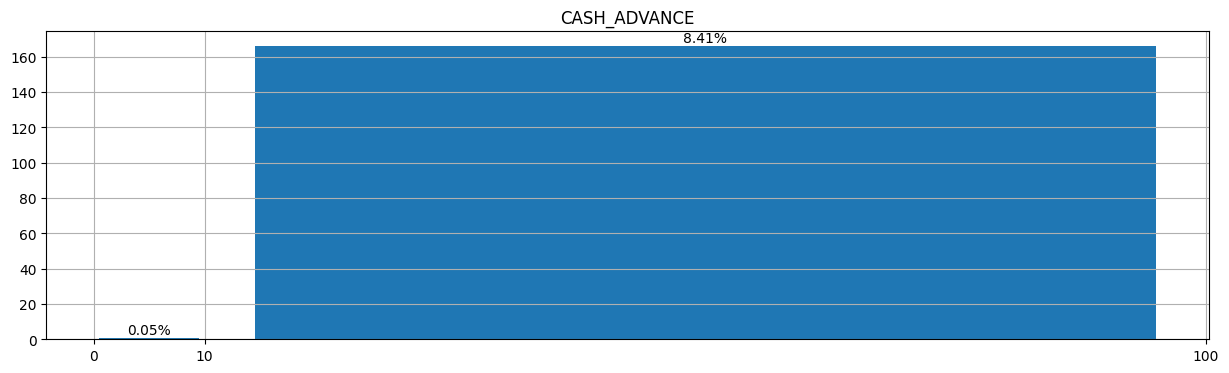

In [68]:
Bar(clust1, 'CASH_ADVANCE', [0, 10,  100])

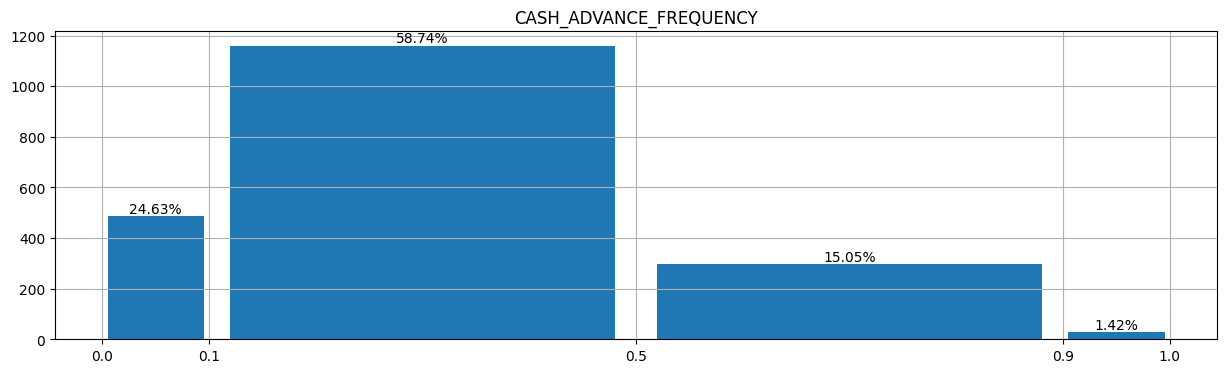

In [69]:
Bar(clust1, 'CASH_ADVANCE_FREQUENCY', [0, .1, .5, .9, 1])

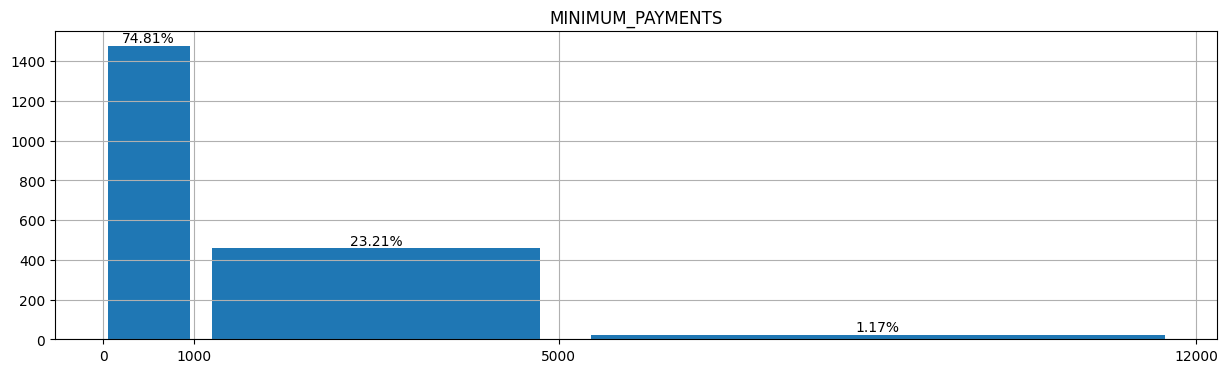

In [70]:
Bar(clust1, 'MINIMUM_PAYMENTS', [0, 1000, 5000, 12000])

In [86]:
clust1['ONEOFF_PURCHASES'].sort_values( ascending=False).head(10)

2044    2.00
2194    1.00
7469    1.00
328     0.05
4454    0.01
2075    0.01
5926    0.00
5933    0.00
5934    0.00
5938    0.00
Name: ONEOFF_PURCHASES, dtype: float64

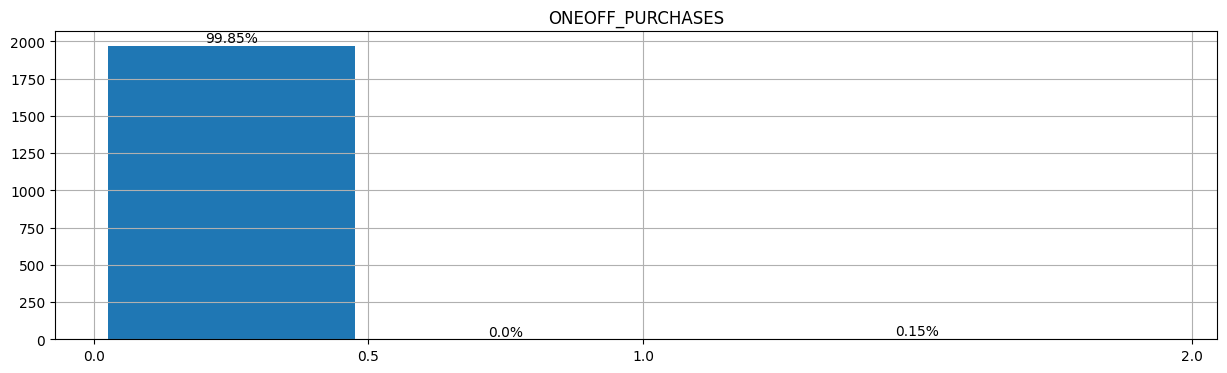

In [88]:
Bar(clust1, 'ONEOFF_PURCHASES', [0, .5, 1, clust1['ONEOFF_PURCHASES'].max()])

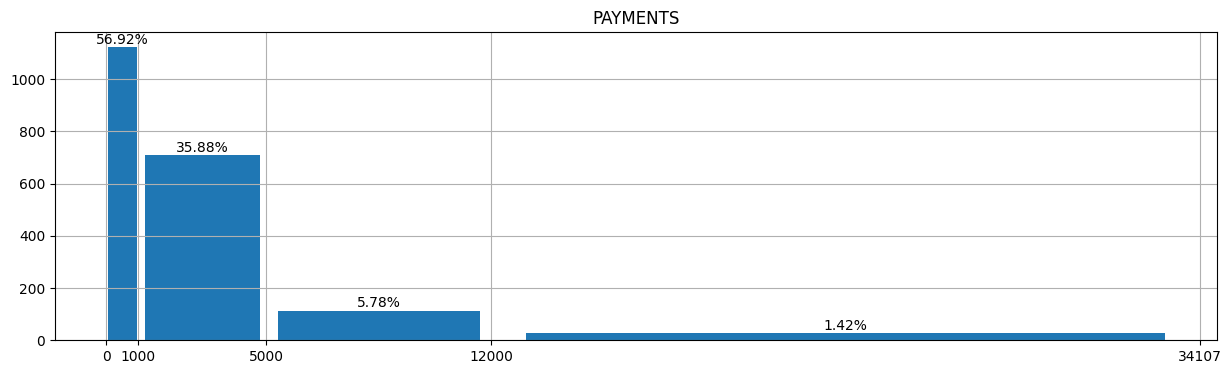

In [89]:
Bar(clust1, 'PAYMENTS', [0, 1000, 5000, 12000, clust1['PAYMENTS'].max()])

- All purchases are associated with one off purchaces
- None customers take cash in advance (0%)
- Most of the balance in this cluster is less than 6000 (90%), and (56%) is under 2000.
- (95%) of the credit limit is well distributed under 12000.
- The balance updates continuously as 90% of the customers does.
- Most customers has a minimum payment each balanc cycle less than 1000.
- (90%) of the payments is under 5000.
- (90%) of the one-off purchases is under 5000.

## Cluster 2

In [90]:
clust2 = new_df[new_df['kmeans'] == 2]

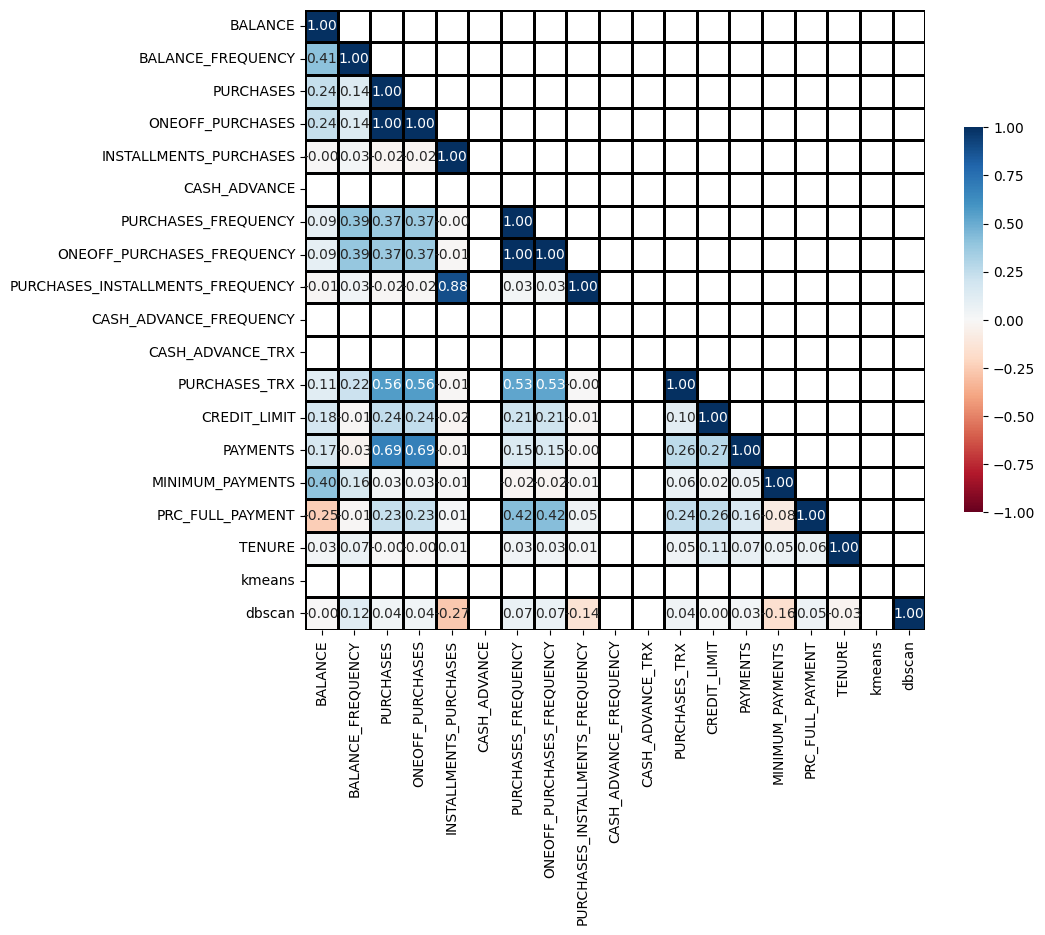

In [91]:
HeatmapPlot(clust2.select_dtypes(include='number').corr(), figsize=(10, 10));

<Axes: xlabel='PURCHASES', ylabel='ONEOFF_PURCHASES'>

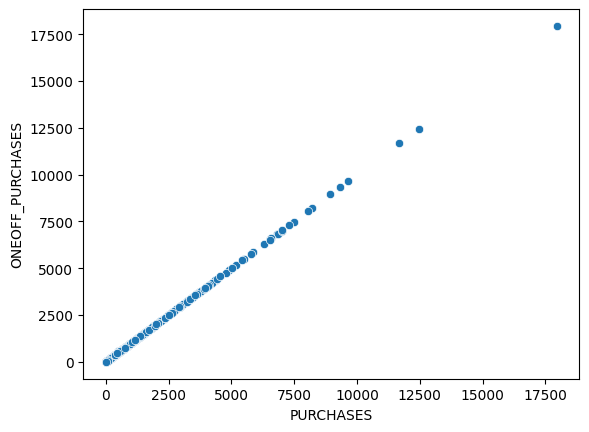

In [92]:
sns.scatterplot(clust2, x='PURCHASES', y='ONEOFF_PURCHASES')

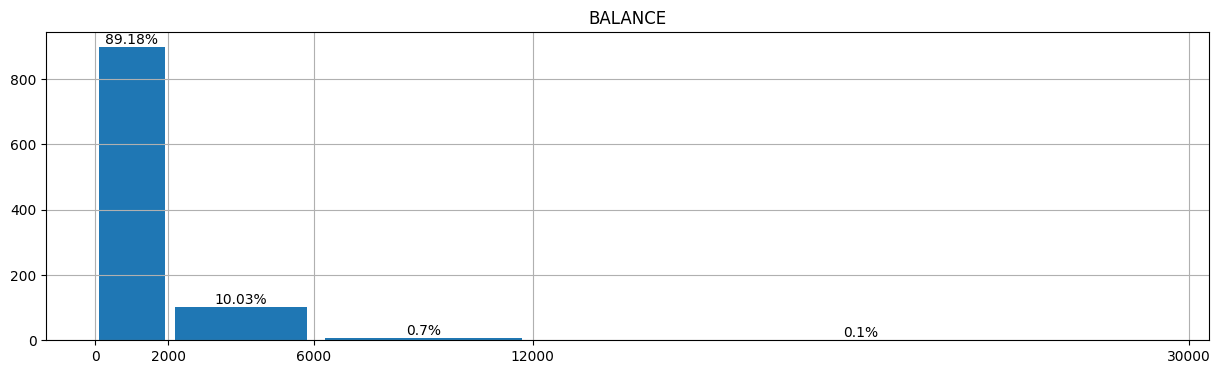

In [93]:
Bar(clust2, 'BALANCE', [0, 2000, 6000, 12000, 30000])

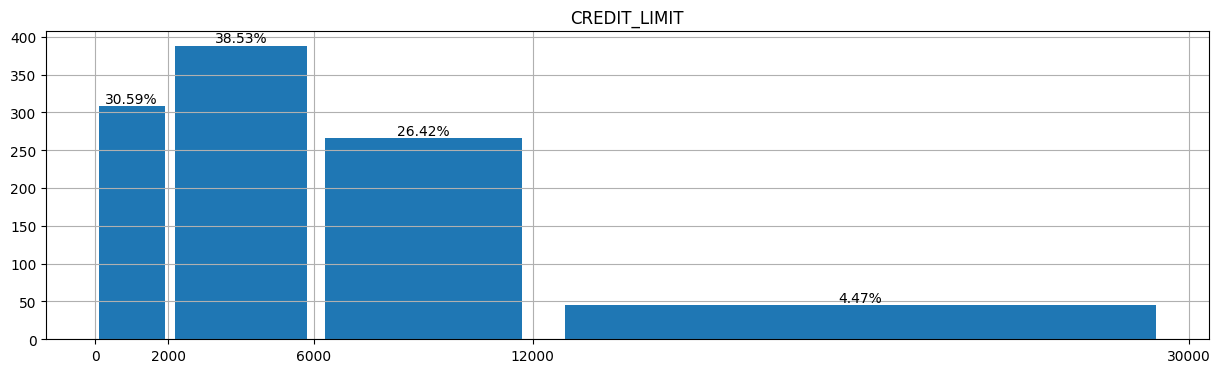

In [94]:
Bar(clust2, 'CREDIT_LIMIT', [0, 2000, 6000, 12000, 30000])

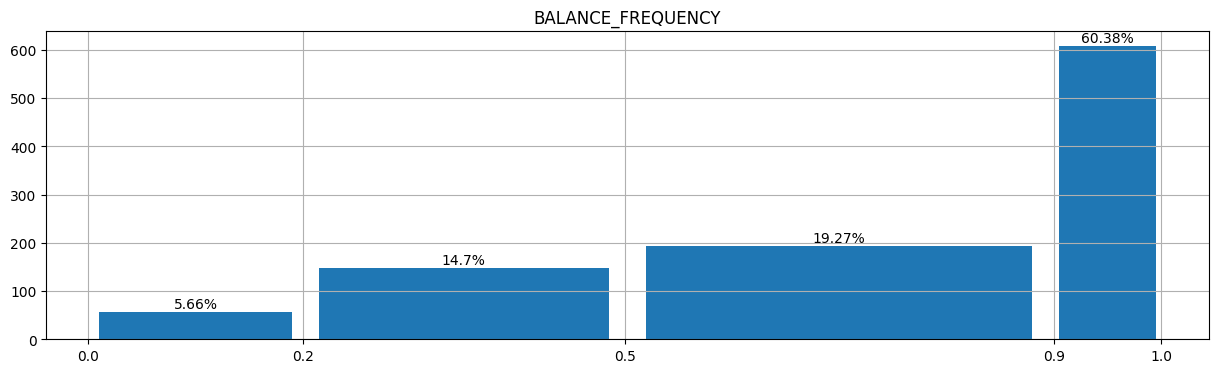

In [95]:
Bar(clust2, 'BALANCE_FREQUENCY', [0, .2, .5, .9, 1])

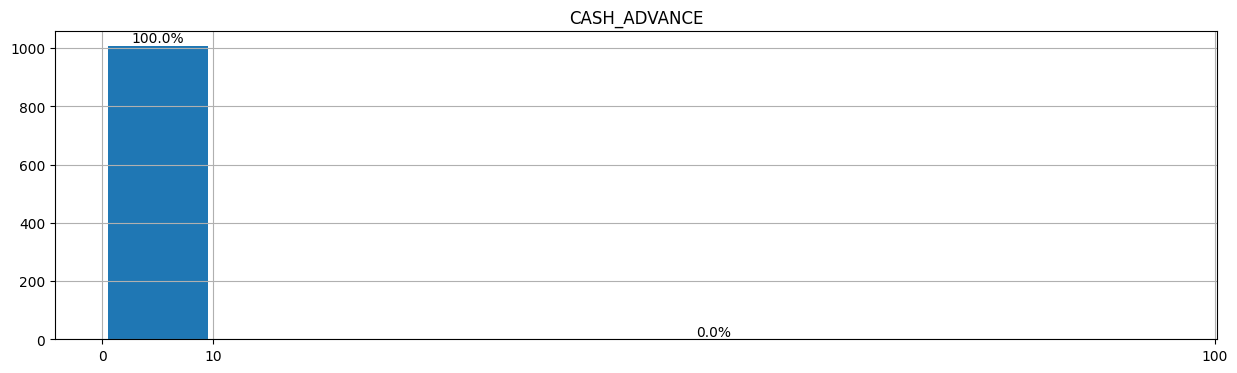

In [96]:
Bar(clust2, 'CASH_ADVANCE', [0, 10,  100])

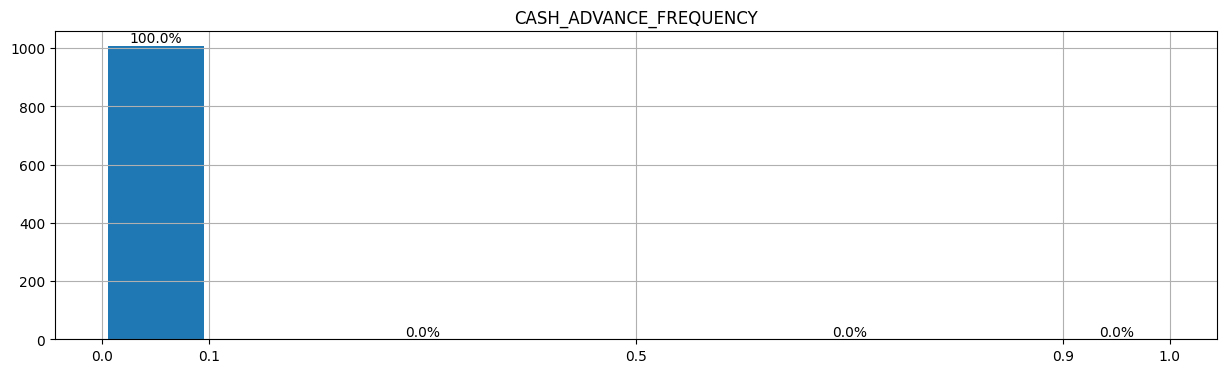

In [97]:
Bar(clust2, 'CASH_ADVANCE_FREQUENCY', [0, .1, .5, .9, 1])

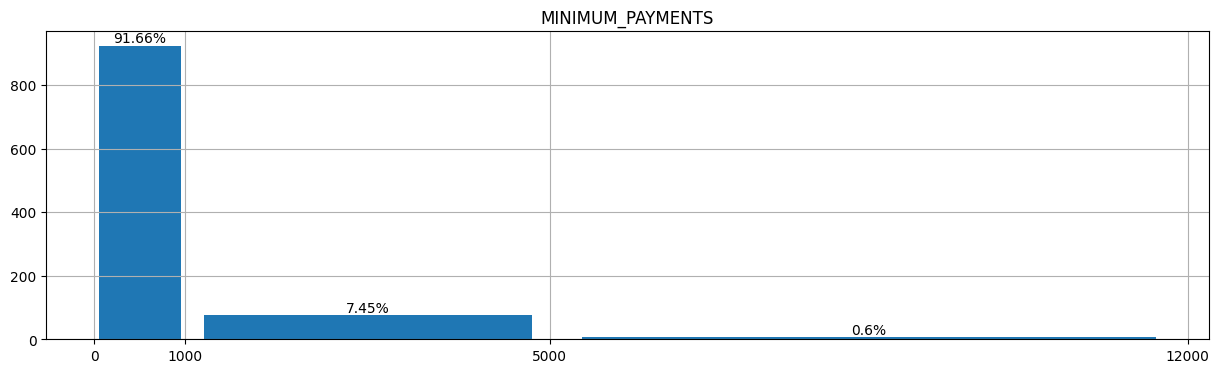

In [98]:
Bar(clust2, 'MINIMUM_PAYMENTS', [0, 1000, 5000, 12000])

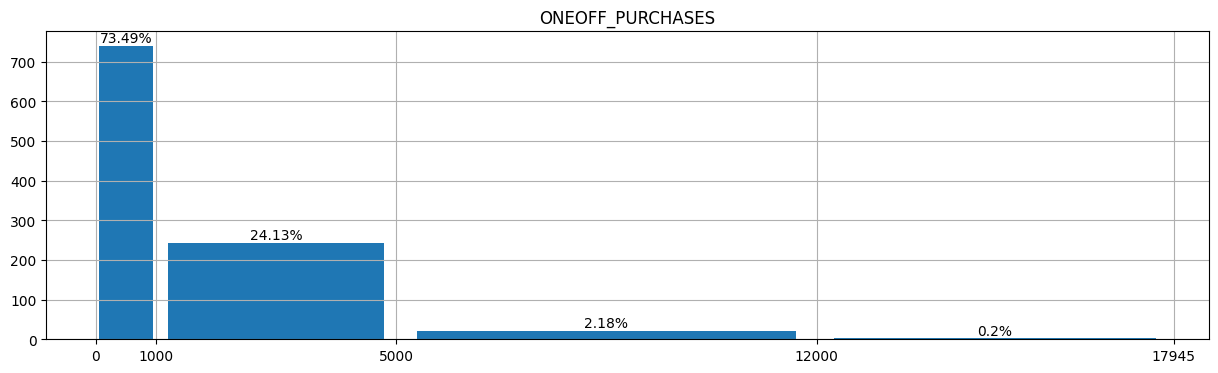

In [99]:
Bar(clust2, 'ONEOFF_PURCHASES', [0, 1000, 5000, 12000, clust2['ONEOFF_PURCHASES'].max()])

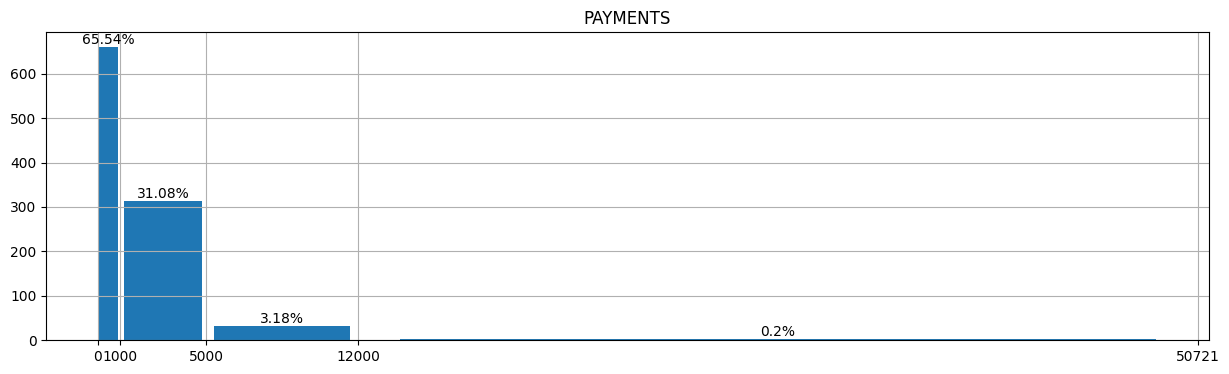

In [100]:
Bar(clust2, 'PAYMENTS', [0, 1000, 5000, 12000, clust2['PAYMENTS'].max()])

- All purchases are associated with one off purchaces
- None customers take cash in advance (0%)
- Most of the balance in this cluster is less than 6000 (90%), and (56%) is under 2000.
- (95%) of the credit limit is well distributed under 12000.
- The balance updates continuously as 90% of the customers does.
- Most customers has a minimum payment each balanc cycle less than 1000.
- (90%) of the payments is under 5000.
- (90%) of the one-off purchases is under 5000.